In [2]:
# Install library piml
!pip install piml

# Import Module Library

In [ ]:
# Import library

#Untuk Explore dan Preprocessing Data
import pandas as pd
import numpy as np
import seaborn as sns
from seaborn import external
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

#Untuk Model
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
import joblib

#Untuk Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

#Untuk Evaluasi Model
from sklearn.metrics import classification_report, roc_auc_score, f1_score, confusion_matrix, RocCurveDisplay

#Untuk Interpretasi Model
from sklearn.tree import export_text
from sklearn.tree import plot_tree
from sklearn.inspection import PartialDependenceDisplay

# Data Exploration

In [ ]:
# Eksplorasi Data

# Import Data
url = 'https://raw.githubusercontent.com/triantonugroho/Thesis/refs/heads/main/Dataset/15000.csv'
df = pd.read_csv(url)

In [ ]:
# Menampilkan 5 data pertama
df.head()

Month  WeekOfMonth  DayOfWeek    Make AccidentArea DayOfWeekClaimed  \
0   Dec            5  Wednesday   Honda        Urban          Tuesday   
1   Jan            3  Wednesday   Honda        Urban           Monday   
2   Oct            5     Friday   Honda        Urban         Thursday   
3   Jun            2   Saturday  Toyota        Rural           Friday   
4   Jan            5     Monday   Honda        Urban          Tuesday   

  MonthClaimed  WeekOfMonthClaimed     Sex MaritalStatus  ...  AgeOfVehicle  \
0          Jan                   1  Female        Single  ...       3 years   
1          Jan                   4    Male        Single  ...       6 years   
2          Nov                   2    Male       Married  ...       7 years   
3          Jul                   1    Male       Married  ...   more than 7   
4          Feb                   2  Female        Single  ...       5 years   

  AgeOfPolicyHolder PoliceReportFiled WitnessPresent AgentType  \
0          26 to 30                No             No  External   
1          31 to 35               Yes             No  External   
2          41 to 50                No             No  External   
3          51 to 65               Yes             No  External   
4          31 to 35                No             No  External   

   NumberOfSuppliments  AddressChange_Claim  NumberOfCars  Year  BasePolicy  
0                 none               1 year        3 to 4  1994   Liability  
1                 none            no change     1 vehicle  1994   Collision  
2                 none            no change     1 vehicle  1994   Collision  
3          more than 5            no change     1 vehicle  1994   Liability  
4                 none            no change     1 vehicle  1994   Collision  

[5 rows x 33 columns]

In [ ]:
# Menampilkan 5 data terakhir
df.tail()

Month  WeekOfMonth  DayOfWeek     Make AccidentArea DayOfWeekClaimed  \
15415   Nov            4     Friday   Toyota        Urban          Tuesday   
15416   Nov            5   Thursday  Pontiac        Urban           Friday   
15417   Nov            5   Thursday   Toyota        Rural           Friday   
15418   Dec            1     Monday   Toyota        Urban         Thursday   
15419   Dec            2  Wednesday   Toyota        Urban         Thursday   

      MonthClaimed  WeekOfMonthClaimed     Sex MaritalStatus  ...  \
15415          Nov                   5    Male       Married  ...   
15416          Dec                   1    Male       Married  ...   
15417          Dec                   1    Male        Single  ...   
15418          Dec                   2  Female       Married  ...   
15419          Dec                   3    Male        Single  ...   

       AgeOfVehicle AgeOfPolicyHolder PoliceReportFiled WitnessPresent  \
15415       6 years          31 to 35                No             No   
15416       6 years          31 to 35                No             No   
15417       5 years          26 to 30                No             No   
15418       2 years          31 to 35                No             No   
15419       5 years          26 to 30                No             No   

      AgentType  NumberOfSuppliments  AddressChange_Claim  NumberOfCars  Year  \
15415  External                 none            no change     1 vehicle  1996   
15416  External          more than 5            no change        3 to 4  1996   
15417  External               1 to 2            no change     1 vehicle  1996   
15418  External          more than 5            no change     1 vehicle  1996   
15419  External               1 to 2            no change     1 vehicle  1996   

       BasePolicy  
15415   Collision  
15416   Liability  
15417   Collision  
15418  All Perils  
15419   Collision  

[5 rows x 33 columns]

In [ ]:
# Menampilkan tipe data
df.dtypes

Month                   object
WeekOfMonth              int64
DayOfWeek               object
Make                    object
AccidentArea            object
DayOfWeekClaimed        object
MonthClaimed            object
WeekOfMonthClaimed       int64
Sex                     object
MaritalStatus           object
Age                      int64
Fault                   object
PolicyType              object
VehicleCategory         object
VehiclePrice            object
FraudFound_P             int64
PolicyNumber             int64
RepNumber                int64
Deductible               int64
DriverRating             int64
Days_Policy_Accident    object
Days_Policy_Claim       object
PastNumberOfClaims      object
AgeOfVehicle            object
AgeOfPolicyHolder       object
PoliceReportFiled       object
WitnessPresent          object
AgentType               object
NumberOfSuppliments     object
AddressChange_Claim     object
NumberOfCars            object
Year                     int64
BasePoli

In [ ]:
# Menampilkan informasi data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

In [8]:
df.info

<bound method DataFrame.info of       Month  WeekOfMonth  DayOfWeek     Make AccidentArea DayOfWeekClaimed  \
0       Dec            5  Wednesday    Honda        Urban          Tuesday   
1       Jan            3  Wednesday    Honda        Urban           Monday   
2       Oct            5     Friday    Honda        Urban         Thursday   
3       Jun            2   Saturday   Toyota        Rural           Friday   
4       Jan            5     Monday    Honda        Urban          Tuesday   
...     ...          ...        ...      ...          ...              ...   
15415   Nov            4     Friday   Toyota        Urban          Tuesday   
15416   Nov            5   Thursday  Pontiac        Urban           Friday   
15417   Nov            5   Thursday   Toyota        Rural           Friday   
15418   Dec            1     Monday   Toyota        Urban         Thursday   
15419   Dec            2  Wednesday   Toyota        Urban         Thursday   

      MonthClaimed  WeekOfMonth

In [ ]:
# Memeriksa duplikasi data
df.duplicated(keep=False).sum()

0

In [9]:
# Hitung jumlah tanda tanya '?' di setiap kolom
missing_question_mark = (df == '?').sum()

# Tampilkan hasil
print(missing_question_mark[missing_question_mark > 0])  # hanya tampilkan kolom yang memiliki '?'

Series([], dtype: int64)


In [10]:
# Memeriksa keberadaan missing value
df.isna().sum()

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
FraudFound_P            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
dtype: int64

In [ ]:
# Menghapus kolom tidak relevan
to_drop = [
    'Month', 'WeekOfMonth','DayOfWeek', 'DayOfWeekClaimed',
    'MonthClaimed', 'WeekOfMonthClaimed', 
    'PolicyNumber','RepNumber','Year']
df= df.drop(columns=to_drop)

In [12]:
# Map Yes→1, N0→0, sisanya jadi NaN
mapping = {'Yes': 1, 'No': 0}
df['PoliceReportFiled'] = df['PoliceReportFiled'].map(mapping)
df['WitnessPresent'] = df['WitnessPresent'].map(mapping)

In [16]:
# Menghitung nilai unik dari setiap kolom
df.nunique()

Make                    19
AccidentArea             2
Sex                      2
MaritalStatus            4
Age                     66
Fault                    2
PolicyType               9
VehicleCategory          3
VehiclePrice             6
FraudFound_P             2
Deductible               4
DriverRating             4
Days_Policy_Accident     5
Days_Policy_Claim        4
PastNumberOfClaims       4
AgeOfVehicle             8
AgeOfPolicyHolder        9
PoliceReportFiled        2
WitnessPresent           2
AgentType                2
NumberOfSuppliments      4
AddressChange_Claim      5
NumberOfCars             5
BasePolicy               3
dtype: int64

In [17]:
# Statistika Deskriptif
df.describe()

Age  FraudFound_P    Deductible  DriverRating  \
count  15420.000000  15420.000000  15420.000000  15420.000000   
mean      39.855707      0.059857    407.704280      2.487808   
std       13.492377      0.237230     43.950998      1.119453   
min        0.000000      0.000000    300.000000      1.000000   
25%       31.000000      0.000000    400.000000      1.000000   
50%       38.000000      0.000000    400.000000      2.000000   
75%       48.000000      0.000000    400.000000      3.000000   
max       80.000000      1.000000    700.000000      4.000000   

       PoliceReportFiled  WitnessPresent  
count       15420.000000    15420.000000  
mean            0.027756        0.005642  
std             0.164279        0.074904  
min             0.000000        0.000000  
25%             0.000000        0.000000  
50%             0.000000        0.000000  
75%             0.000000        0.000000  
max             1.000000        1.000000

#### Filter DataFrame untuk Age bukan 0


In [ ]:
# Memfilter data untuk Age bukan 0
df = df[df['Age'] != 0]

In [19]:
# Check nilai minimum Age

# Statistika Deskriptif
df.describe()

Age  FraudFound_P    Deductible  DriverRating  \
count  15100.000000  15100.000000  15100.000000  15100.000000   
mean      40.700331      0.059073    407.874172      2.488212   
std       12.309493      0.235769     44.391196      1.120435   
min       16.000000      0.000000    300.000000      1.000000   
25%       31.000000      0.000000    400.000000      1.000000   
50%       39.000000      0.000000    400.000000      2.000000   
75%       49.000000      0.000000    400.000000      3.000000   
max       80.000000      1.000000    700.000000      4.000000   

       PoliceReportFiled  WitnessPresent  
count       15100.000000    15100.000000  
mean            0.027748        0.005629  
std             0.164256        0.074819  
min             0.000000        0.000000  
25%             0.000000        0.000000  
50%             0.000000        0.000000  
75%             0.000000        0.000000  
max             1.000000        1.000000

Nilai minimum Age sudah 16 tahun

In [ ]:
# Menetapkan fitur kategorik
cat_features = ['Make','AccidentArea','Sex','MaritalStatus',
                'Fault','PolicyType','VehicleCategory',
                'VehiclePrice','Days_Policy_Accident','Days_Policy_Claim',
                'PastNumberOfClaims','AgeOfVehicle','AgeOfPolicyHolder',
                'AgentType','NumberOfSuppliments','AddressChange_Claim',
                'NumberOfCars','BasePolicy']

In [ ]:
# Menetapkan fitur numerik
num_features = ['Age','FraudFound_P','Deductible','DriverRating'
                ,'PoliceReportFiled','WitnessPresent']

In [ ]:
# Menghitung jumlah fitur kategorik dan numerik
len(cat_features), len(num_features)

(18, 6)

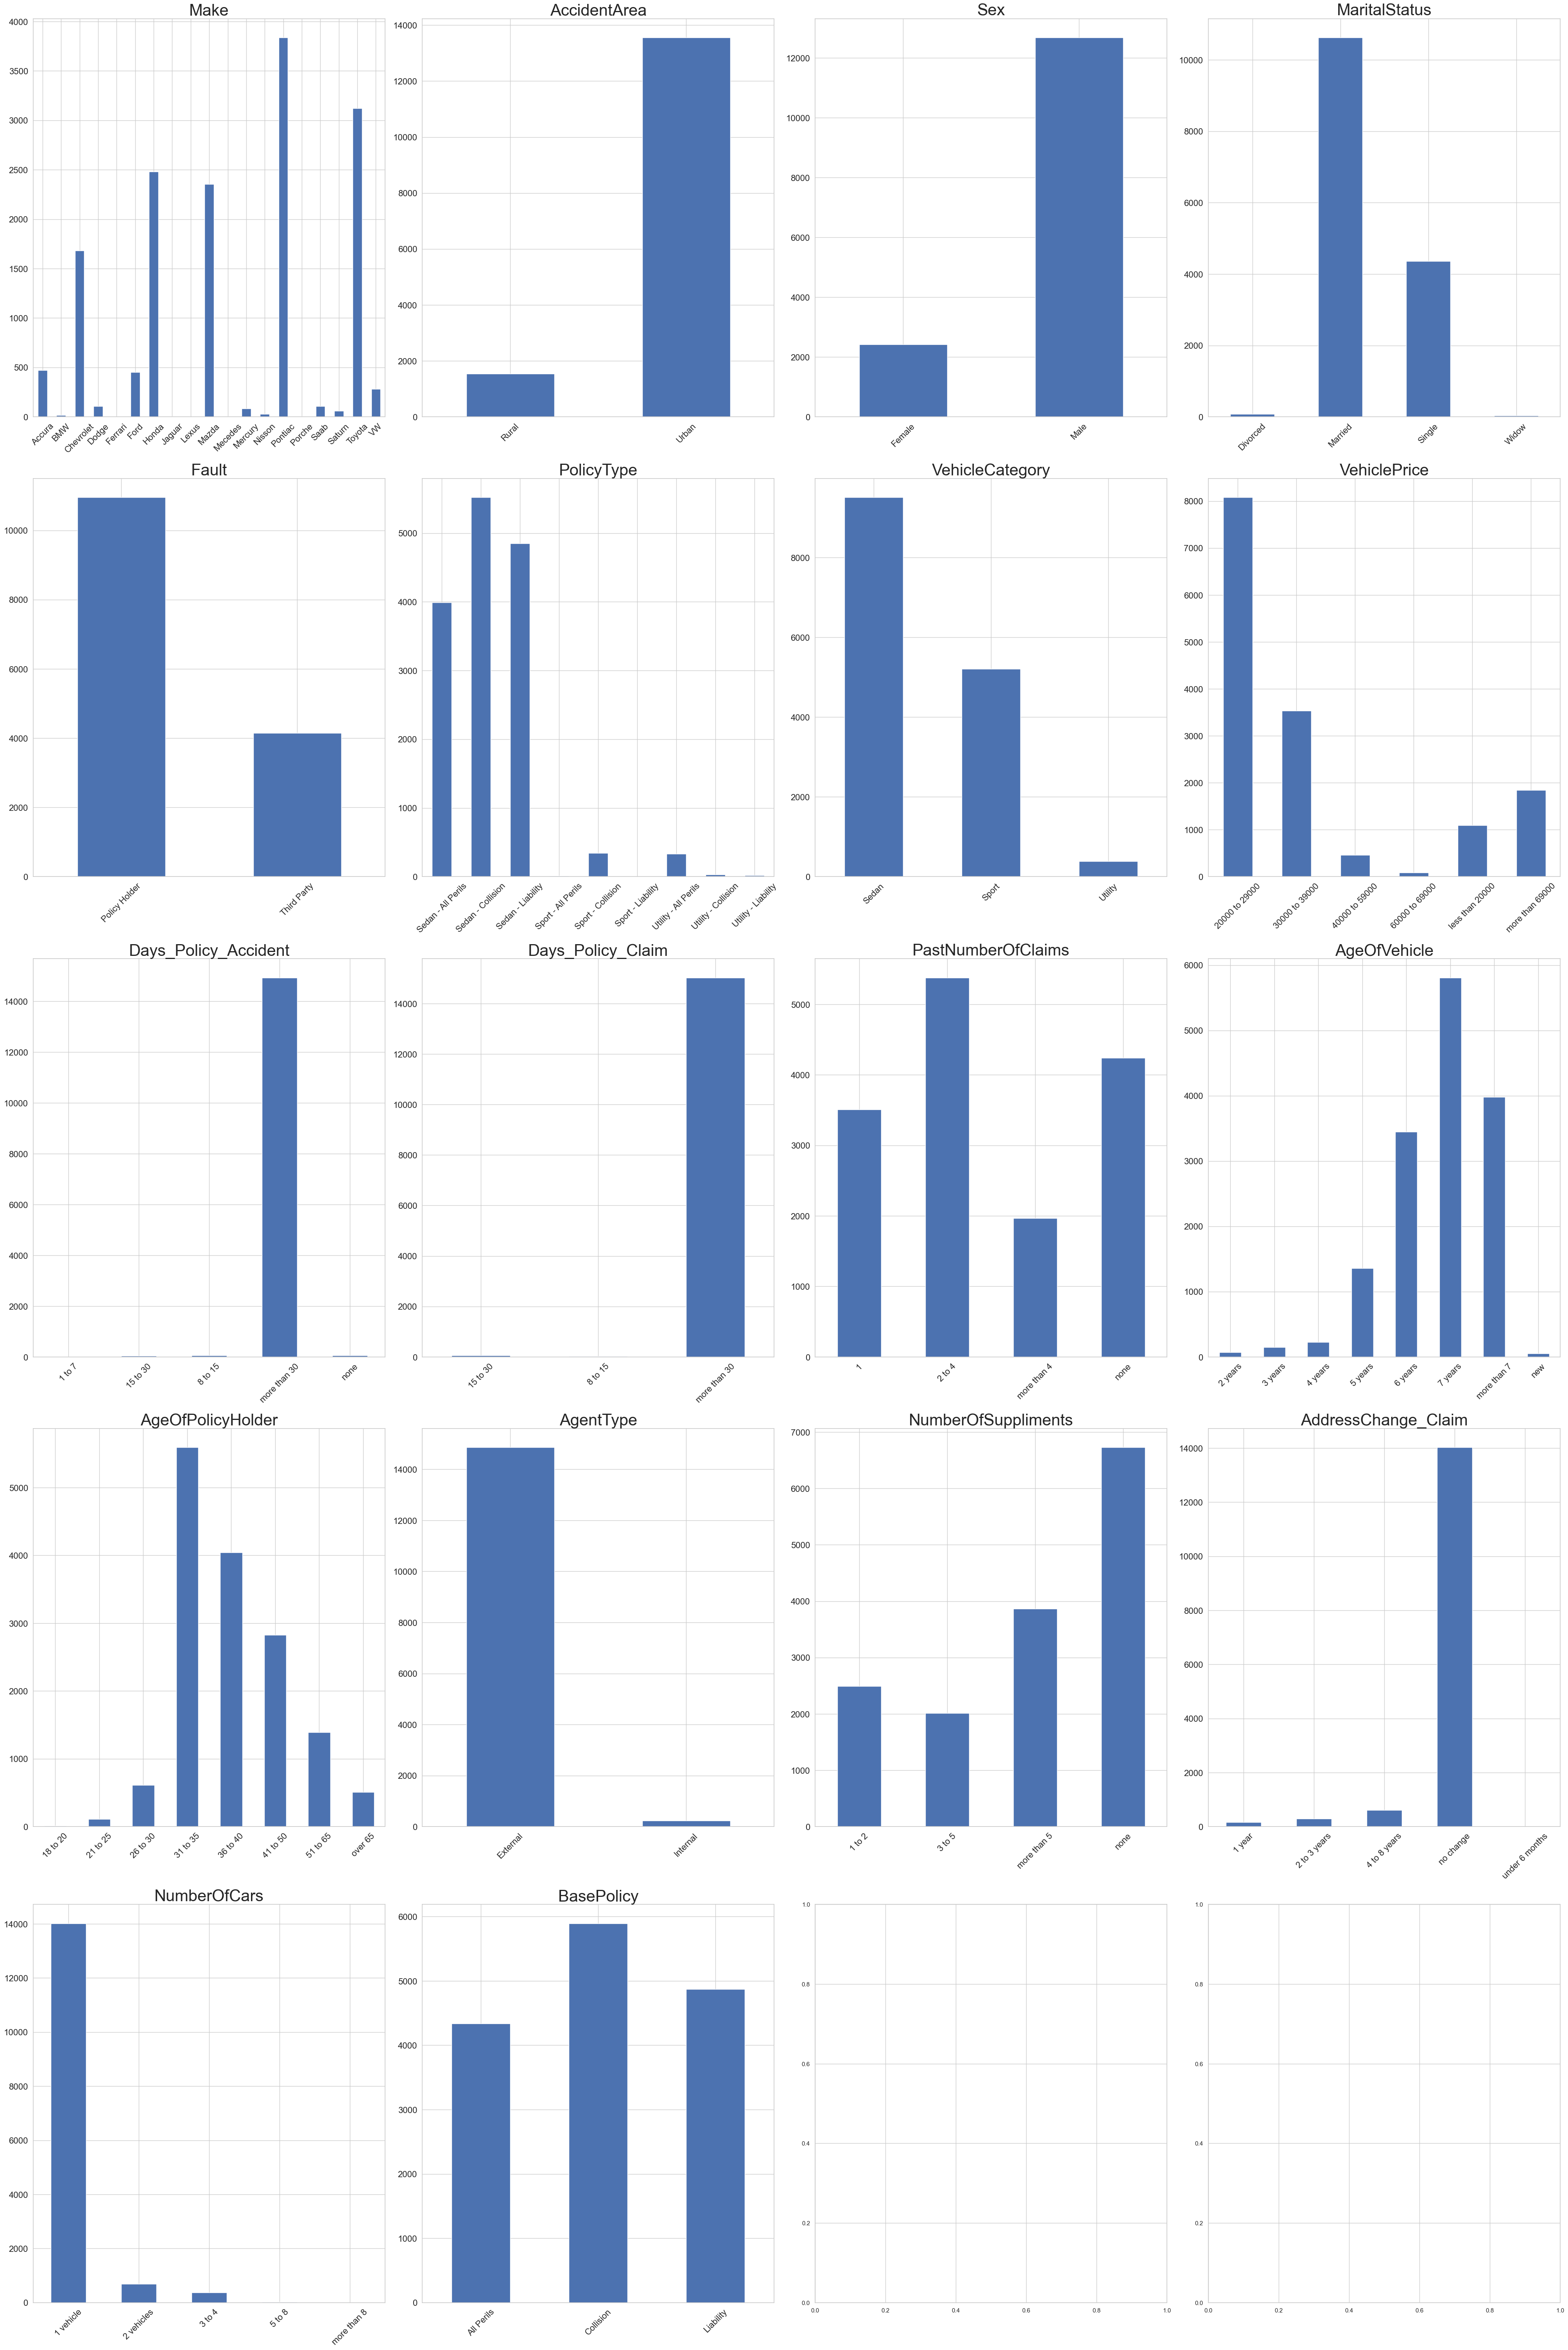

In [ ]:
# Visualisasi fitur kategorik
sns.set(style='whitegrid')

fig, ax = plt.subplots(5, 4, figsize=(40,60), constrained_layout=True)
for i in range(6):
    for j in range(4):
        if 4*i + j < len(cat_features):
            df[cat_features[4*i + j]].value_counts().sort_index().plot.bar(ax=ax[i, j])
            ax[i, j].tick_params('x', rotation=45)
            ax[i, j].tick_params(labelsize=16)
            ax[i, j].set_title(cat_features[4*i + j], size=30)

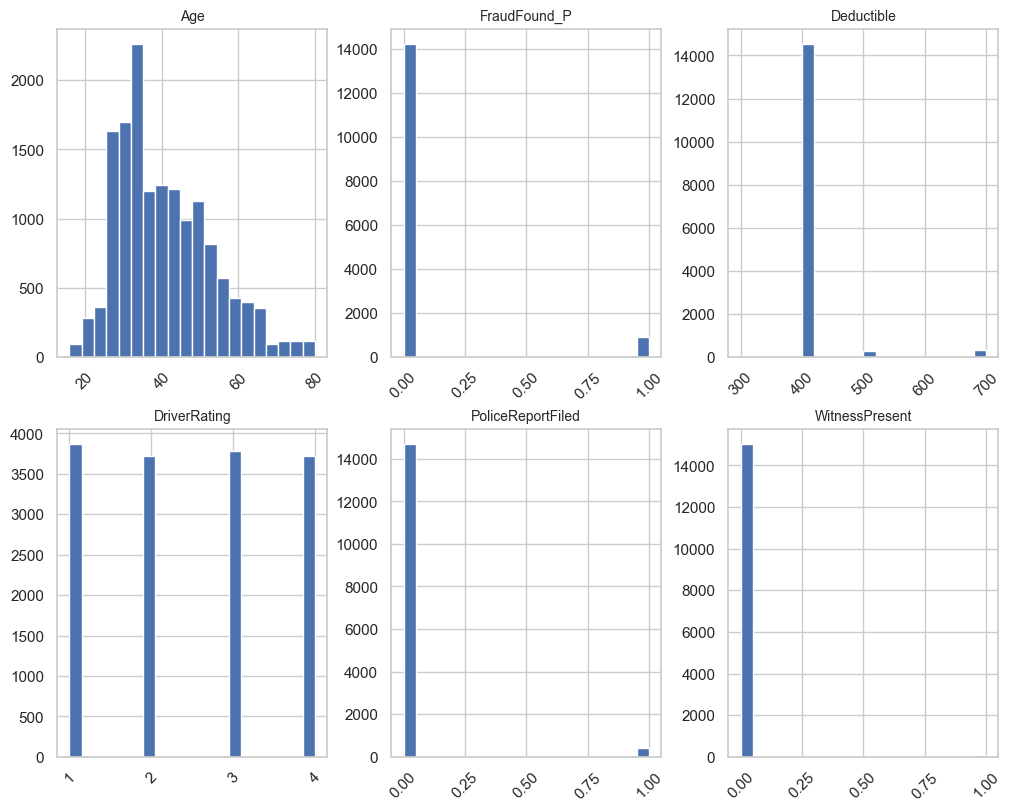

In [ ]:
# Visualisasi fitur numerik
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 3, figsize=(10, 8), constrained_layout=True)
axes = axes.flatten()  # jadi 1D array panjang 6

for idx, feature in enumerate(num_features):
    if idx < len(axes):
        ax = axes[idx]
        df[feature].hist(bins=20, ax=ax)
        ax.tick_params(axis='x', rotation=45)
        ax.set_title(feature, size=10)

# Jika jumlah fitur < 6, sembunyikan sisa axes
for ax in axes[len(num_features):]:
    ax.set_visible(False)

plt.show()


C:\Users\trian\AppData\Local\Temp\ipykernel_15372\1997586575.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


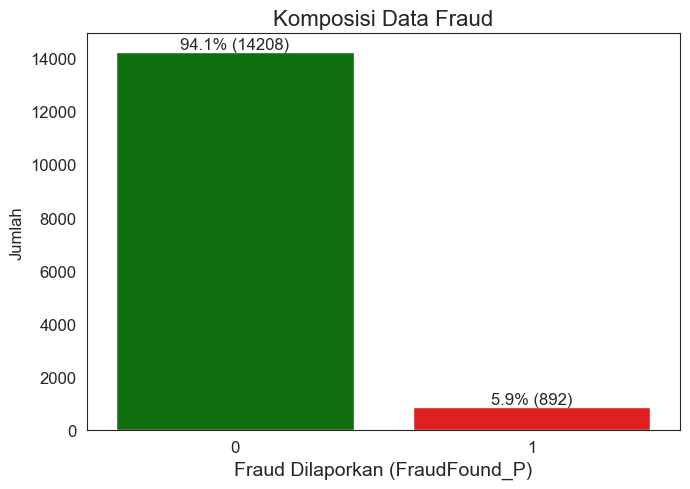

In [ ]:
# Visualisasi Komposisi Data Fraud
import matplotlib.pyplot as plt
import seaborn as sns

# ── Siapkan data ──────────────────────────────────────────────
plot_df = df.copy()                       
plot_df['FraudFound_P'] = plot_df['FraudFound_P'].astype(str)

# ── Gaya plot ─────────────────────────────────────────────────
sns.set_style("white")                   
palette = {'0': 'green', '1': 'red'}

plt.figure(figsize=(7, 5))
ax = sns.countplot(
    data=plot_df,
    x='FraudFound_P',
    palette=palette,
    order=['0', '1']
)

# ── Keterangan sumbu & judul ─────────────────────────────────
ax.set_xlabel('Fraud Dilaporkan (FraudFound_P)', fontsize=14)
ax.set_ylabel('Jumlah', fontsize=12)
ax.set_title('Komposisi Data Fraud', fontsize=16)
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

# ── Tambahkan persentase + jumlah di atas batang ─────────────
total = len(plot_df)
for p in ax.patches:
    count = int(p.get_height())
    percentage = 100 * count / total
    label = f'{percentage:.1f}% ({count})'
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    ax.annotate(label, (x, y), ha='center', va='bottom', fontsize=12)

# ── Matikan grid horizontal ───────────────────────────────────
ax.grid(False, axis='y')

plt.tight_layout()
plt.show()


# Pre-Pipeline

In [ ]:
# Menampilkan seluruh kolom 5 data pertama
pd.set_option('display.max_columns', None)
df.head()

Make AccidentArea     Sex MaritalStatus  Age          Fault  \
0   Honda        Urban  Female        Single   21  Policy Holder   
1   Honda        Urban    Male        Single   34  Policy Holder   
2   Honda        Urban    Male       Married   47  Policy Holder   
3  Toyota        Rural    Male       Married   65    Third Party   
4   Honda        Urban  Female        Single   27    Third Party   

          PolicyType VehicleCategory     VehiclePrice  FraudFound_P  \
0  Sport - Liability           Sport  more than 69000             0   
1  Sport - Collision           Sport  more than 69000             0   
2  Sport - Collision           Sport  more than 69000             0   
3  Sedan - Liability           Sport   20000 to 29000             0   
4  Sport - Collision           Sport  more than 69000             0   

   Deductible  DriverRating Days_Policy_Accident Days_Policy_Claim  \
0         300             1         more than 30      more than 30   
1         400             4         more than 30      more than 30   
2         400             3         more than 30      more than 30   
3         400             2         more than 30      more than 30   
4         400             1         more than 30      more than 30   

  PastNumberOfClaims AgeOfVehicle AgeOfPolicyHolder  PoliceReportFiled  \
0               none      3 years          26 to 30                  0   
1               none      6 years          31 to 35                  1   
2                  1      7 years          41 to 50                  0   
3                  1  more than 7          51 to 65                  1   
4               none      5 years          31 to 35                  0   

   WitnessPresent AgentType NumberOfSuppliments AddressChange_Claim  \
0               0  External                none              1 year   
1               0  External                none           no change   
2               0  External                none           no change   
3               0  External         more than 5           no change   
4               0  External                none           no change   

  NumberOfCars BasePolicy  
0       3 to 4  Liability  
1    1 vehicle  Collision  
2    1 vehicle  Collision  
3    1 vehicle  Liability  
4    1 vehicle  Collision

In [28]:
#Features & Label Setting
data = df.drop(columns=['FraudFound_P'])
label = df[['FraudFound_P']]
feature_names = data.columns

In [ ]:
# Split data
x_train, x_test, y_train, y_test = train_test_split(data,label, train_size=0.8, random_state=1)

In [ ]:
# Menampilkan x_train
x_train

Make AccidentArea     Sex MaritalStatus  Age          Fault  \
5565      Toyota        Rural    Male       Married   28    Third Party   
11325  Chevrolet        Urban    Male       Married   45    Third Party   
7612     Pontiac        Urban    Male       Married   50  Policy Holder   
8          Honda        Urban    Male        Single   30  Policy Holder   
3075       Honda        Urban  Female      Divorced   46  Policy Holder   
...          ...          ...     ...           ...  ...            ...   
945        Mazda        Rural    Male       Married   46  Policy Holder   
5332   Chevrolet        Rural    Male       Married   40    Third Party   
12439       Ford        Urban    Male       Married   30    Third Party   
249       Accura        Urban    Male       Married   51  Policy Holder   
13628     Toyota        Urban    Male       Married   51  Policy Holder   

               PolicyType VehicleCategory     VehiclePrice  Deductible  \
5565    Sedan - Liability           Sport   30000 to 39000         400   
11325   Sedan - Collision           Sedan   30000 to 39000         400   
7612    Sedan - Liability           Sport   30000 to 39000         400   
8       Sport - Collision           Sport  more than 69000         400   
3075    Sedan - Liability           Sport   20000 to 29000         400   
...                   ...             ...              ...         ...   
945    Sedan - All Perils           Sedan   20000 to 29000         400   
5332   Sedan - All Perils           Sedan   30000 to 39000         700   
12439   Sedan - Collision           Sedan   30000 to 39000         400   
249     Sedan - Collision           Sedan   20000 to 29000         400   
13628  Sedan - All Perils           Sedan  more than 69000         400   

       DriverRating Days_Policy_Accident Days_Policy_Claim PastNumberOfClaims  \
5565              3         more than 30      more than 30               none   
11325             1         more than 30      more than 30             2 to 4   
7612              4         more than 30      more than 30             2 to 4   
8                 4         more than 30      more than 30               none   
3075              4         more than 30      more than 30             2 to 4   
...             ...                  ...               ...                ...   
945               3         more than 30      more than 30             2 to 4   
5332              2         more than 30      more than 30               none   
12439             1         more than 30      more than 30             2 to 4   
249               2         more than 30      more than 30             2 to 4   
13628             1         more than 30      more than 30               none   

      AgeOfVehicle AgeOfPolicyHolder  PoliceReportFiled  WitnessPresent  \
5565       7 years          31 to 35                  0               0   
11325      7 years          36 to 40                  0               0   
7612   more than 7          41 to 50                  0               0   
8          6 years          31 to 35                  0               1   
3075       7 years          41 to 50                  0               0   
...            ...               ...                ...             ...   
945        5 years          41 to 50                  0               0   
5332       7 years          36 to 40                  0               0   
12439      7 years          31 to 35                  0               0   
249    more than 7          41 to 50                  0               0   
13628  more than 7          41 to 50                  0               0   

      AgentType NumberOfSuppliments AddressChange_Claim NumberOfCars  \
5565   External              3 to 5        4 to 8 years   2 vehicles   
11325  External         more than 5           no change    1 vehicle   
7612   External                none           no change    1 vehicle   
8      External              3 to 5           no change    1

In [ ]:
# Menampilkan y_train
y_train

FraudFound_P
5565              0
11325             0
7612              0
8                 0
3075              0
...             ...
945               1
5332              0
12439             0
249               0
13628             0

[12080 rows x 1 columns]

In [ ]:
# Menetapkan pipeline preprocessing
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OrdinalEncoder

# 1) Definisikan urutan level harga kendaraan
VehiclePrice_levels = [
    'less than 20000','20000 to 29000', '30000 to 39000', 
    '40000 to 59000', '60000 to 69000', 'more than 69000'
]

# 2) Definisikan urutan level hari selisih antara tanggal mulai polis dengan tanggal terjadi kecelakaan
Days_Policy_Accident_levels = [
    'none','1 to 7', '8 to 15', 
    '15 to 30', 'more than 30'
]

# 3) Definisikan urutan level hari selisih antara tanggal mulai polis dengan tanggal pengajuan klaim
Days_Policy_Claim_levels = [
    'none','8 to 15', '15 to 30', 
    'more than 30'
]

# 4) Definisikan urutan level jumlah klaim sebelumnya
PastNumberOfClaims_levels = [
    'none','1', '2 to 4', 
    'more than 4'
]

# 5) Definisikan urutan level usia kendaraan
AgeOfVehicle_levels = [
    'new','2 years', '3 years', '4 years', '5 years', 
    '6 years', '7 years', 'more than 7'
]

# 6) Definisikan urutan level usia pemegang polis
AgeOfPolicyHolder_levels = [
    '16 to 17', '18 to 20', '21 to 25', '26 to 30', '31 to 35', 
    '36 to 40', '41 to 50', '51 to 65', 'over 65'
]

# 7) Definisikan urutan level jumlah tambahan biaya klaim
NumberOfSuppliments_levels = [
    'none', '1 to 2', '3 to 5', 'more than 5'
]

# 8) Definisikan urutan level perubahan alamat klaim
AddressChange_Claim_levels = [
    'no change', 'under 6 months', '1 year', 
    '2 to 3 years', '4 to 8 years'
]

# 9) Definisikan urutan level jumlah kendaraan
NumberOfCars_levels = [
    '1 vehicle', '2 vehicles', '3 to 4', 
    '5 to 8', 'more than 8' 
]

# Kelompokkan kolom
ord_col = ['VehiclePrice', 'Days_Policy_Accident', 'Days_Policy_Claim',
           'PastNumberOfClaims', 'AgeOfVehicle', 'AgeOfPolicyHolder',
           'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars']

cat_col = ['Make','AccidentArea','Sex','MaritalStatus',
           'Fault','PolicyType','VehicleCategory',
           'AgentType','BasePolicy']

num_col = ['Age','Deductible','DriverRating','PoliceReportFiled','WitnessPresent']

# Buat transformer untuk masing-masing
numerical_transformer = Pipeline([
    ('scaler', MinMaxScaler())
])

ordinal_transformer = Pipeline([
    ('ord_enc', OrdinalEncoder(
        categories=[
            VehiclePrice_levels,
            Days_Policy_Accident_levels,
            Days_Policy_Claim_levels,
            PastNumberOfClaims_levels,
            AgeOfVehicle_levels,
            AgeOfPolicyHolder_levels,
            NumberOfSuppliments_levels,
            AddressChange_Claim_levels,
            NumberOfCars_levels],
        handle_unknown='use_encoded_value',
        unknown_value=-1
    ))
])

categorical_transformer = Pipeline([
    ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# 4) Gabungkan ke ColumnTransformer
preprocessing = ColumnTransformer([
    ('num', numerical_transformer, num_col),
    ('ord', ordinal_transformer,  ord_col),
    ('cat', categorical_transformer, cat_col)
], remainder='drop')


# DATA BALANCING (SMOTE)

In [35]:
import joblib

# Ganti path dengan path file .pkl hasil penyimpanan
loaded_pipeline = joblib.load("dt15_models/dt15_gridsearch_full_20250526_231950.pkl")

In [36]:
# Ambil tahap preprocessing dan SMOTE
preprocessing = loaded_pipeline.named_steps['preprocessing']
smote = loaded_pipeline.named_steps['oversampling']

# Transform x_train dan lakukan SMOTE untuk melihat distribusinya
x_train_transformed = preprocessing.fit_transform(x_train)
x_smote, y_smote = smote.fit_resample(x_train_transformed, y_train)

C:\Users\trian\AppData\Local\Temp\ipykernel_20268\1884566425.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


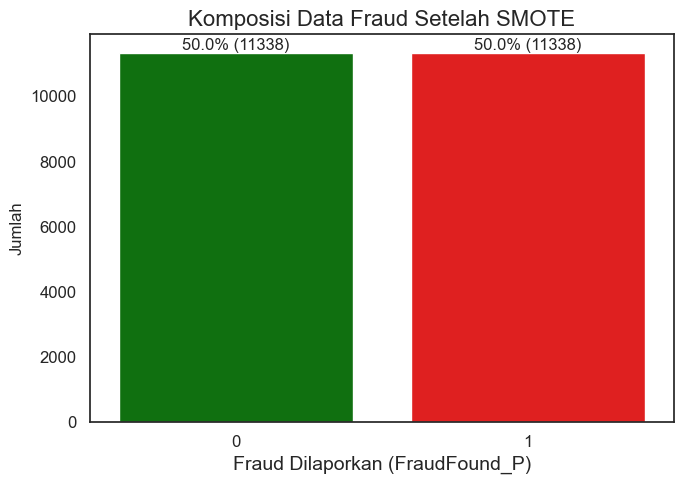

In [ ]:
# Visualisasi Komposisi Data Fraud setelah SMOTE
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ── Ambil label hasil SMOTE dan flatten jadi 1-D array of str ─────────
labels = y_smote.values.ravel().astype(str)  # .values jika y_smote DataFrame, .ravel() untuk flatten

# ── Buat Series → DataFrame satu kolom ────────────────────────────
resampled_series = pd.Series(labels, name='FraudFound_P')
plot_df = resampled_series.to_frame()

# ── Mulai plotting ────────────────────────────────────────────────
sns.set_style("white")
palette = {'0': 'green', '1': 'red'}

plt.figure(figsize=(7, 5))
ax = sns.countplot(
    data=plot_df,
    x='FraudFound_P',
    palette=palette,
    order=['0', '1']
)

ax.set_xlabel('Fraud Dilaporkan (FraudFound_P)', fontsize=14)
ax.set_ylabel('Jumlah', fontsize=12)
ax.set_title('Komposisi Data Fraud Setelah SMOTE', fontsize=16)
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

# ── Tambahkan persentase + jumlah di atas tiap batang ─────────────
total = len(plot_df)
for p in ax.patches:
    count = p.get_height()
    pct = 100 * count / total
    label = f"{pct:.1f}% ({int(count)})"
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    ax.annotate(label, (x, y), ha='center', va='bottom', fontsize=12)

# ── Matikan grid horizontal ──────────────────────────────────────
ax.grid(False, axis='y')

plt.tight_layout()
plt.show()


# PIPELINE
- Decision Tree
- Random Forest
- XGBoost
- Surrogate XGBoost
- XGBoost Depth 2

## DECISION TREE

### Model

In [ ]:
# Training Model Decision Tree
param_dt = {'max_depth': np.arange(5, 10),
            'min_samples_leaf': (50, 100, 150, 200, 250, 300, 350, 400, 450, 500),
            'min_samples_split': (50, 100, 150, 200, 250, 300, 350, 400, 450, 500)}

# Create pipelines with SMOTE for each model (nested GridSearchCV)
dt_grid = GridSearchCV(DecisionTreeClassifier(criterion='entropy'), param_grid=param_dt, scoring='roc_auc', cv=5)

dt_pipeline = ImbPipeline([
    ('preprocessing', preprocessing),
    ('oversampling', SMOTE(random_state=1)),
    ('grid_search', dt_grid)
])

dt_pipeline.fit(x_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['Age', 'Deductible',
                                                   'DriverRating',
                                                   'PoliceReportFiled',
                                                   'WitnessPresent']),
                                                 ('ord',
                                                  Pipeline(steps=[('ord_enc',
                                                                   OrdinalEncoder(categories=[['less '
                                                                                               'than '
                                                                                               '20000',
                                                                                               '20000 '
                                                                                               'to '
                                                                                               '29000',
                                                                                               '30000 '
                                                                                               'to '
                                                                                               '39000',
                                                                                               '40000 '
                                                                                               'to '
                                                                                               '59000',
                                                                                               '60000 '
                                                                                               'to '
                                                                                               '69000',
                                                                                               'm...
                                                   'VehicleCategory',
                                                   'AgentType',
                                                   'BasePolicy'])])),
                ('oversampling', SMOTE(random_state=1)),
                ('grid_search',
                 GridSearchCV(cv=5,
                              estimator=DecisionTreeClassifier(criterion='entropy'),
                              param_grid={'max_depth': array([5, 6, 7, 8, 9]),
                                          'min_samples_leaf': (50, 100, 150,
                                                               200, 250, 300,
                                                               350, 400, 450,
                                                               500),
                                          'min_samples_split': (50, 100, 150,
                                                                200, 250, 300,
                                                                350, 400, 450,
                                                                500)},
                              scoring='roc_auc'))])

**Menyimpan Model**

In [ ]:
# Menyimpan Model Decision Tree
import joblib
import os
from datetime import datetime

def save_full_pipeline(pipeline, model_name="dt15_full_pipeline", models_dir="dt15_models"):
    """
    Simpan seluruh pipeline (preprocessing, oversampling, grid_search/model) 
    sebagai satu file .pkl yang bisa langsung di-load kembali.
    """
    os.makedirs(models_dir, exist_ok=True)
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    filename = f"{models_dir}/{model_name}_{timestamp}.pkl"
    joblib.dump(pipeline, filename)
    print(f"✅ Full pipeline saved to: {filename}")
    return filename

# Contoh pemakaian, setelah kamu .fit(dt_pipeline, x_train, y_train):
saved_path_dt15 = save_full_pipeline(dt_pipeline, model_name="dt15_gridsearch_full")


✅ Full pipeline saved to: dt15_models/dt15_gridsearch_full_20250526_231950.pkl


In [ ]:
# Menampilkan hyperparameter terbaik Decision Tree
import joblib

# Load seluruh pipeline
loaded_pipeline_dt15 = joblib.load(saved_path_dt15)

# Akses GridSearchCV di dalam pipeline
gs = loaded_pipeline_dt15.named_steps['grid_search']

# Ambil dan print best hyperparameters
best_params = gs.best_params_
print("Best hyperparameters:", best_params)


Best hyperparameters: {'max_depth': 9, 'min_samples_leaf': 50, 'min_samples_split': 100}


In [173]:
# Ambil hasil CV dari GridSearchCV
cv_results = loaded_pipeline_dt15.named_steps['grid_search'].cv_results_

# 3) Tampilkan sebagai DataFrame dan sortir berdasarkan rank_test_score
pd.DataFrame(cv_results).sort_values("rank_test_score", ascending=True)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
401       0.169832      0.004505         0.007572        0.000824   
400       0.165797      0.003430         0.007402        0.000490   
402       0.158780      0.004066         0.007621        0.000789   
403       0.154230      0.008046         0.007386        0.000506   
404       0.158832      0.003404         0.007420        0.000477   
..             ...           ...              ...             ...   
95        0.111799      0.001719         0.007404        0.000493   
96        0.118196      0.002393         0.007601        0.000488   
97        0.108002      0.007685         0.007620        0.000535   
98        0.111000      0.002624         0.007016        0.000878   
99        0.111125      0.005569         0.006718        0.000854   

    param_max_depth param_min_samples_leaf param_min_samples_split  \
401               9                     50                     100   
400               9                     50                      50   
402               9                     50                     150   
403               9                     50                     200   
404               9                     50                     250   
..              ...                    ...                     ...   
95                5                    500                     300   
96                5                    500                     350   
97                5                    500                     400   
98                5                    500                     450   
99                5                    500                     500   

                                                params  split0_test_score  \
401  {'max_depth': 9, 'min_samples_leaf': 50, 'min_...           0.909842   
400  {'max_depth': 9, 'min_samples_leaf': 50, 'min_...           0.909538   
402  {'max_depth': 9, 'min_samples_leaf': 50, 'min_...           0.908630   
403  {'max_depth': 9, 'min_samples_leaf': 50, 'min_...           0.906583   
404  {'max_depth': 9, 'min_samples_leaf': 50, 'min_...           0.906573   
..                                                 ...                ...   
95   {'max_depth': 5, 'min_samples_leaf': 500, 'min...           0.833244   
96   {'max_depth': 5, 'min_samples_leaf': 500, 'min...           0.833244   
97   {'max_depth': 5, 'min_samples_leaf': 500, 'min...           0.833244   
98   {'max_depth': 5, 'min_samples_leaf': 500, 'min...           0.833244   
99   {'max_depth': 5, 'min_samples_leaf': 500, 'min...           0.833244   

     split1_test_score  split2_test_score  split3_test_score  \
401           0.960668           0.957942           0.952953   
400           0.960669           0.957944           0.952953   
402           0.960455           0.956720           0.953432   
403           0.959329           0.956146           0.952268   
404           0.959222           0.954832           0.951182   
..                 ...                ...                ...   
95            0.869790           0.863315           0.860272   
96            0.869790           0.863315           0.860272   
97            0.869790           0.863315           0.860272   
98            0.869790           0.863315           0.860272   
99            0.869790           0.863315           0.860272   

     split4_test_score  mean_test_score  std_test_score  rank_test_score  
401           0.953672         0.947016        0.018800                1  
400           0.953672         0.946955        0.018921                2  
402           0.952469         0.946341        0.019062                3  
403           0.951951         0.945255        0.019525                4  
404           0.950544         0.944471        0.019199                5  
..                 ...              ...             ...              ...  
95            0.849801         0.855284        0.012772              491  
96            0.849801         0.855284  

**Menampilkan Rules dan Tree**

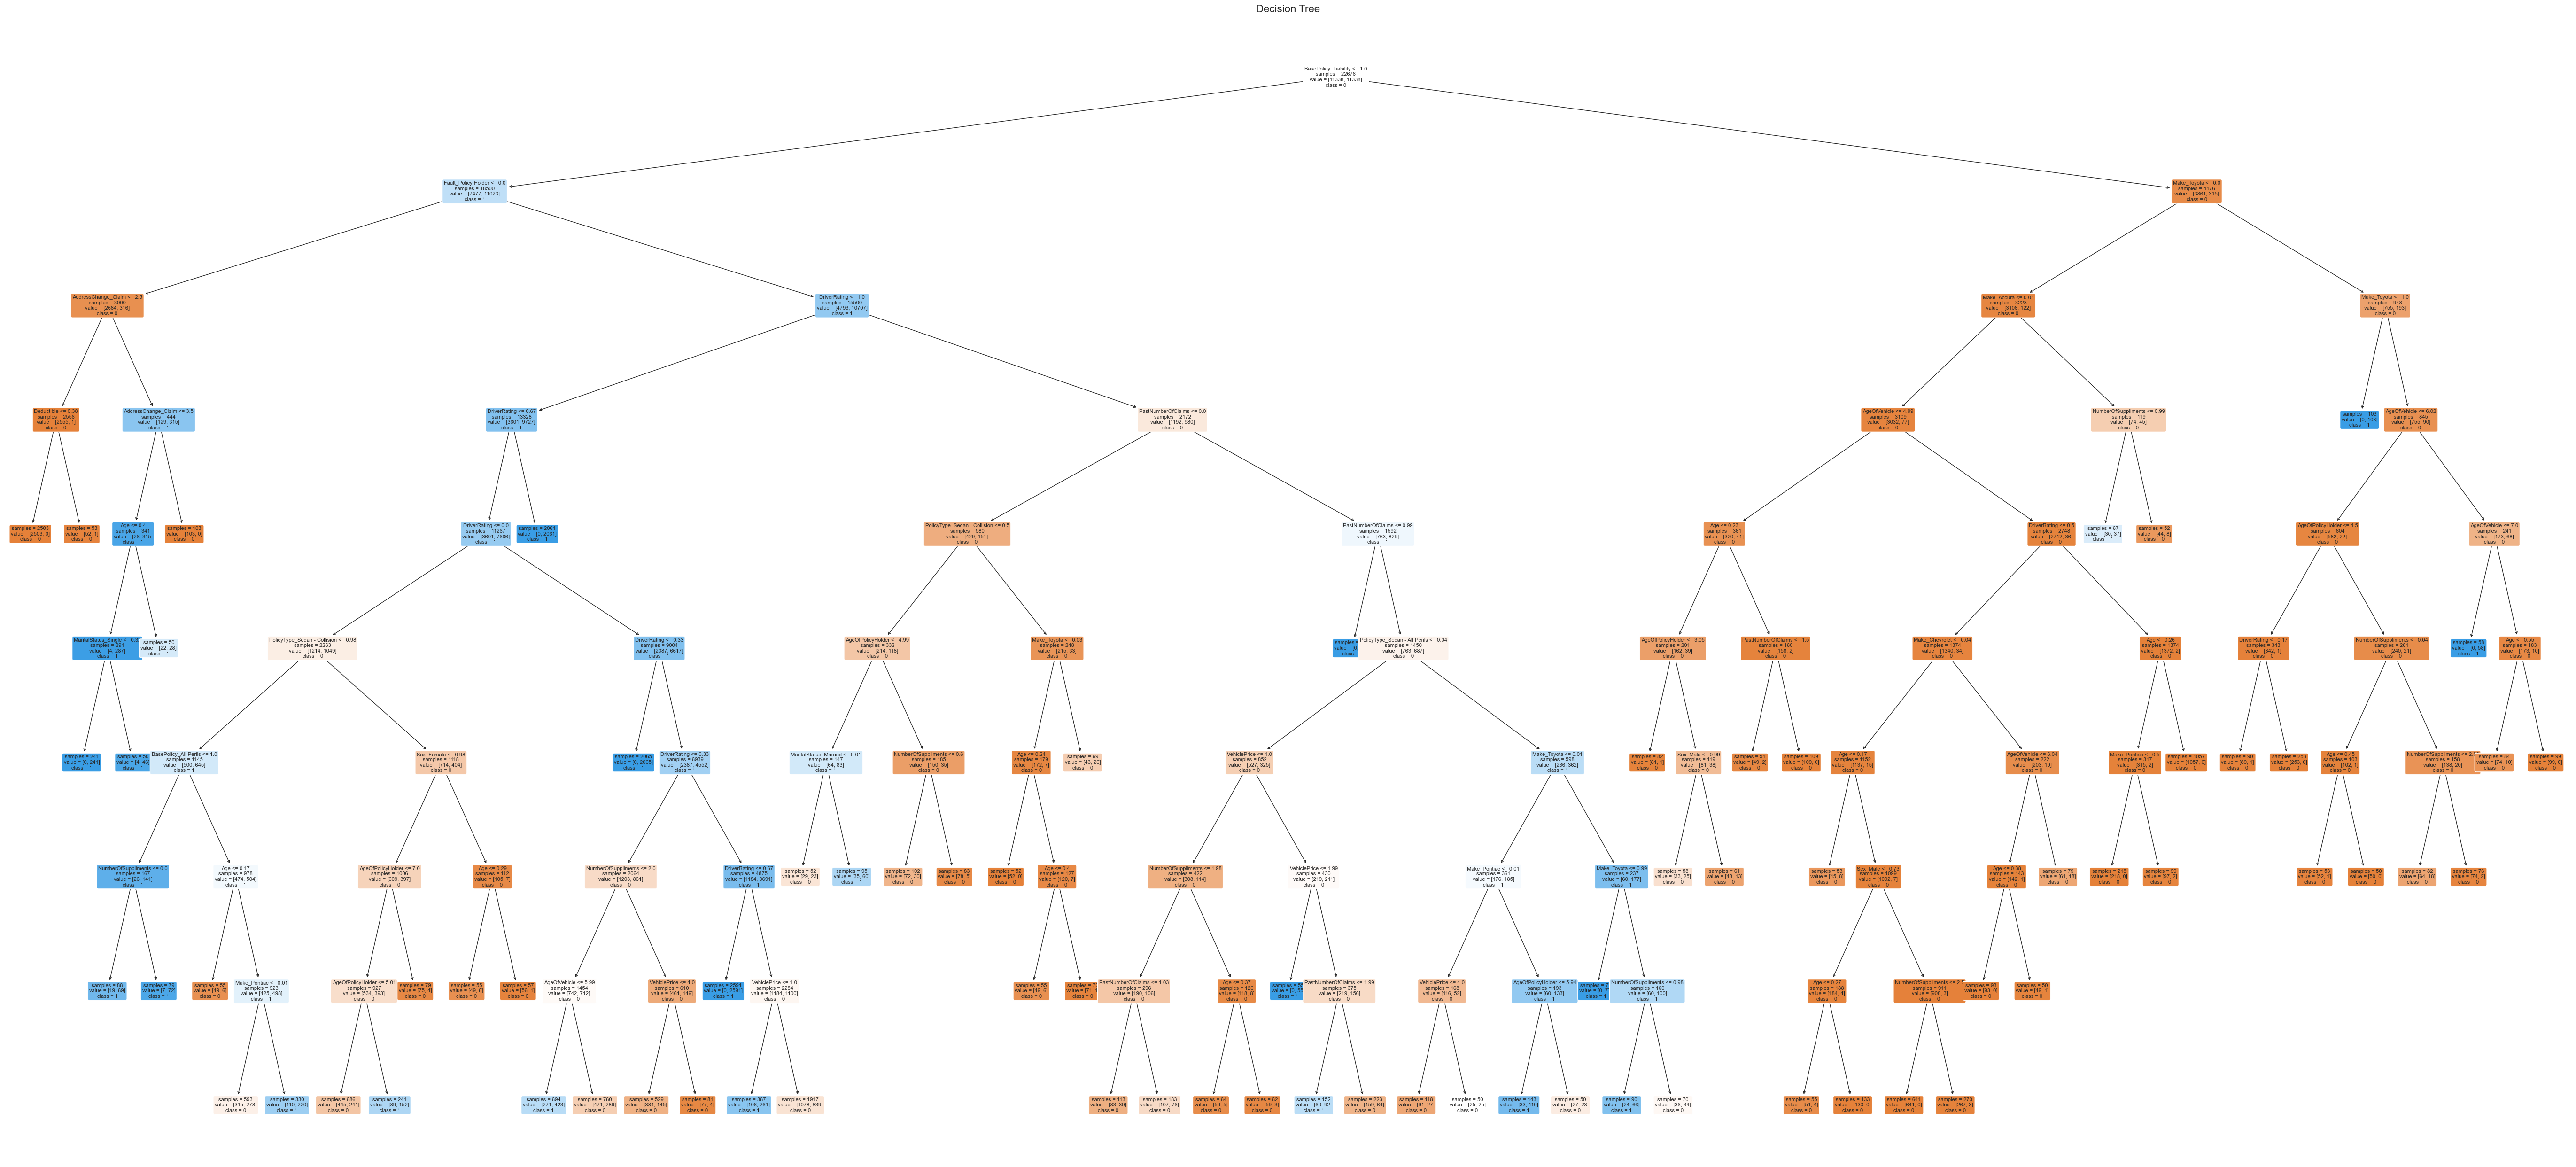


=== FULL RULE SET  ===

|-- BasePolicy_Liability <= 0.9982
|  |-- Fault_Policy Holder <= 0.0011
|  |  |-- AddressChange_Claim <= 2.5000
|  |  |  |-- Deductible <= 0.3750
|  |  |  |  |-- class: 0
|  |  |  |-- Deductible >  0.3750
|  |  |  |  |-- class: 0
|  |  |-- AddressChange_Claim >  2.5000
|  |  |  |-- AddressChange_Claim <= 3.5000
|  |  |  |  |-- Age <= 0.4035
|  |  |  |  |  |-- MaritalStatus_Single <= 0.3162
|  |  |  |  |  |  |-- class: 1
|  |  |  |  |  |-- MaritalStatus_Single >  0.3162
|  |  |  |  |  |  |-- class: 1
|  |  |  |  |-- Age >  0.4035
|  |  |  |  |  |-- class: 1
|  |  |  |-- AddressChange_Claim >  3.5000
|  |  |  |  |-- class: 0
|  |-- Fault_Policy Holder >  0.0011
|  |  |-- DriverRating <= 0.9998
|  |  |  |-- DriverRating <= 0.6670
|  |  |  |  |-- DriverRating <= 0.0000
|  |  |  |  |  |-- PolicyType_Sedan - Collision <= 0.9827
|  |  |  |  |  |  |-- BasePolicy_All Perils <= 0.9977
|  |  |  |  |  |  |  |-- NumberOfSuppliments <= 0.0028
|  |  |  |  |  |  |  |  |-- clas

In [ ]:
# Menampilkan Tree dan Full Rule Set Decision Tree
import joblib
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree, export_text

# 1) Muat pipeline & ambil model terbaik
pipeline      = joblib.load(saved_path_dt15)
dt_pipeline   = pipeline.named_steps['grid_search'].best_estimator_
if hasattr(dt_pipeline, 'named_steps'):
    dt = dt_pipeline.named_steps['model']
else:
    dt = dt_pipeline

# 2) Ambil dan bersihkan nama fitur
raw_names = pipeline.named_steps['preprocessing'].get_feature_names_out()
feature_names = [n.split('__',1)[-1] for n in raw_names]

# 3) Visualisasi full‐depth tree
plt.figure(figsize=(55, 25))
plot_tree(
    dt,
    feature_names=feature_names,
    class_names=[str(c) for c in dt.classes_],
    filled=True,
    rounded=True,
    fontsize=8,
    max_depth=None,     # tampilkan semua level
    label='all',        # tampilkan split + samples + value + class di leaf
    impurity=False,     # hilangkan impurity
    proportion=False,   # tampilkan counts (samples), bukan proporsi
    precision=2         # presisi angka threshold
)
plt.title("Decision Tree", fontsize=16, pad=12)
plt.tight_layout()
plt.savefig("dt15_tree.png", dpi=300, bbox_inches="tight")
plt.show()

# 4) Cetak aturan lengkap tanpa weights
rules = export_text(
    dt,
    feature_names=feature_names,
    show_weights=False,  # hilangkan counts di rules
    spacing=2,
    decimals=4
)
print("\n=== FULL RULE SET  ===\n")
print(rules)



### Statistical Performances

In [ ]:
# Statistik Performa Decision Tree

# prediksi langsung pake pipeline:
y_pred = loaded_pipeline_dt15.predict(x_test)
y_prob = loaded_pipeline_dt15.predict_proba(x_test)[:, 1]

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94      2870
           1       0.12      0.20      0.15       150

    accuracy                           0.89      3020
   macro avg       0.54      0.56      0.55      3020
weighted avg       0.92      0.89      0.90      3020



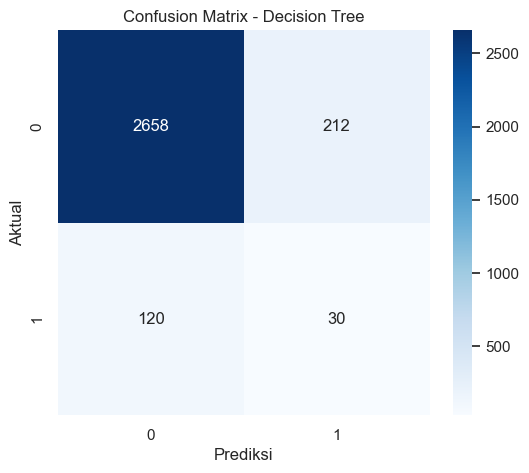

In [ ]:
# Confusion Matrix Decision Tree

# Predict langsung pakai pipeline
y_pred = loaded_pipeline_dt15.predict(x_test)

# 3. Buat confusion matrix
cm = confusion_matrix(y_test, y_pred)

# 4. Plot heatmap
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.title("Confusion Matrix - Decision Tree")
plt.show()

In [ ]:
# Metrik ROC AUC, Sensitivity & Specificity Decision Tree

# Load pipeline, pisahkan antara preprocessor & model
pipeline    = joblib.load(saved_path_dt15)
preprocessor = pipeline.named_steps['preprocessing']
dt           = pipeline.named_steps['grid_search'].best_estimator_

# Ubah x_test menjadi fitur numerik saja
X_test_enc = preprocessor.transform(x_test)

# Prediksi
y_prob = dt.predict_proba(X_test_enc)[:, 1]
y_pred = dt.predict(X_test_enc)

# Hitung metrik
roc_auc = roc_auc_score(y_test, y_prob)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

print(f"ROC AUC Score : {roc_auc:.4f}")
print(f"Sensitivity   : {sensitivity:.4f}")
print(f"Specificity   : {specificity:.4f}")


ROC AUC Score : 0.7840
Sensitivity   : 0.2000
Specificity   : 0.9261


<Figure size 800x600 with 0 Axes>

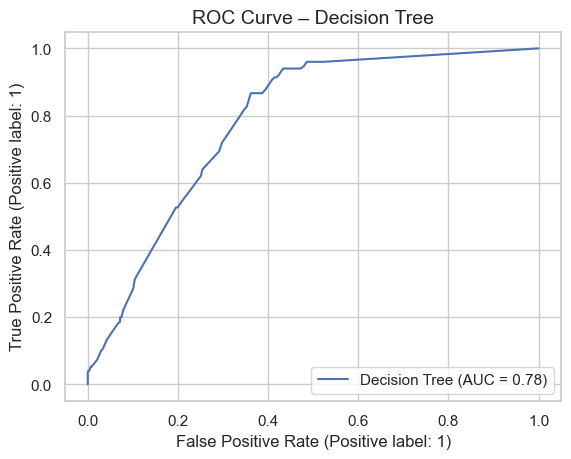

In [ ]:
# ROC Curve Decision Tree

# Ambil preprocessing step dan best model dari GridSearchCV
preproc      = loaded_pipeline_dt15.named_steps['preprocessing']
grid_search  = loaded_pipeline_dt15.named_steps['grid_search']
best_model   = grid_search.best_estimator_

# Bangun pipeline inference (tanpa SMOTE)
infer = Pipeline([
    ('preprocessing', preproc),
    ('model',          best_model)
])

# Hitung probabilitas positif
y_prob = infer.predict_proba(x_test)[:, 1]

# Plot ROC Curve
plt.figure(figsize=(8, 6))
RocCurveDisplay.from_predictions(
    y_test,
    y_prob,
    name="Decision Tree",
    pos_label=1
)
plt.title("ROC Curve – Decision Tree", fontsize=14)
plt.show()

In [ ]:
# Iterasi Simulasi 10x Decision Tree

# Muat kembali pipeline GridSearch (yang berisi 'grid_search' step) —
# Misalnya Anda menyimpannya sebagai 'grid_pipeline':
import joblib
grid_pipeline = joblib.load(saved_path_dt15)              # pipeline asli
grid_search   = grid_pipeline.named_steps['grid_search']
best_params   = grid_search.best_params_              # ← ambil BEST PARAM sebelum override

# Siapkan list untuk mengumpulkan metrik —
roc_auc_list     = []
specificity_list = []
sensitivity_list = []

# Loop 10 kali dengan pipeline fresh setiap iterasi —
for i in range(1, 11):
    # a) Buat ulang DecisionTreeClassifier pakai best_params
    model_dt = DecisionTreeClassifier(criterion='entropy', **best_params)
    pipeline = ImbPipeline([
        ('preprocessing', preprocessing),           # gunakan pipeline preprocessing Anda
        ('oversampling',   SMOTE(random_state=1)),  # SMOTE hanya di training
        ('model',          model_dt)
    ])
    
    # b) Fit di training
    pipeline.fit(x_train, y_train)
    
    # c) Predict & prob di test
    y_pred = pipeline.predict(x_test)
    y_prob = pipeline.predict_proba(x_test)[:, 1]
    
    # d) Hitung ROC-AUC
    roc = roc_auc_score(y_test, y_prob)
    roc_auc_list.append(roc)
    
    # e) Hitung specificity & sensitivity
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    spec = tn / (tn + fp) if (tn + fp) else 0
    sens = tp / (tp + fn) if (tp + fn) else 0
    specificity_list.append(spec)
    sensitivity_list.append(sens)
    
    # f) Tampilkan hasil iterasi
    print(f"Iteration {i:2d}  —  ROC AUC: {roc:.4f},  Spec: {spec:.4f},  Sens: {sens:.4f}")

# Rata-rata dan Std Deviasi —
roc_mean  = np.mean(roc_auc_list)
roc_std   = np.std(roc_auc_list, ddof=1)
spec_mean = np.mean(specificity_list)
spec_std  = np.std(specificity_list, ddof=1)
sens_mean = np.mean(sensitivity_list)
sens_std  = np.std(sensitivity_list, ddof=1)

print("\n" + "—"*50)
print("Rata-rata ± Std.Dev (10 iterasi):")
print(f"ROC AUC     : {roc_mean:.4f} ± {roc_std:.4f}")
print(f"Specificity : {spec_mean:.4f} ± {spec_std:.4f}")
print(f"Sensitivity : {sens_mean:.4f} ± {sens_std:.4f}")


Iteration  1  —  ROC AUC: 0.7840,  Spec: 0.9261,  Sens: 0.2000
Iteration  2  —  ROC AUC: 0.7840,  Spec: 0.9261,  Sens: 0.2000
Iteration  3  —  ROC AUC: 0.7840,  Spec: 0.9261,  Sens: 0.2000
Iteration  4  —  ROC AUC: 0.7840,  Spec: 0.9261,  Sens: 0.2000
Iteration  5  —  ROC AUC: 0.7840,  Spec: 0.9261,  Sens: 0.2000
Iteration  6  —  ROC AUC: 0.7840,  Spec: 0.9261,  Sens: 0.2000
Iteration  7  —  ROC AUC: 0.7840,  Spec: 0.9261,  Sens: 0.2000
Iteration  8  —  ROC AUC: 0.7840,  Spec: 0.9261,  Sens: 0.2000
Iteration  9  —  ROC AUC: 0.7840,  Spec: 0.9261,  Sens: 0.2000
Iteration 10  —  ROC AUC: 0.7840,  Spec: 0.9261,  Sens: 0.2000

——————————————————————————————————————————————————
Rata-rata ± Std.Dev (10 iterasi):
ROC AUC     : 0.7840 ± 0.0000
Specificity : 0.9261 ± 0.0000
Sensitivity : 0.2000 ± 0.0000


## RANDOM FOREST

### Model

In [ ]:
# Training Model Random Forest
param_rf = {'max_depth': np.arange(5, 10),
            'min_samples_leaf': (50, 100, 150, 200, 250, 300, 350, 400, 450, 500),
            'min_samples_split': (50, 100, 150, 200, 250, 300, 350, 400, 450, 500)}

rf_grid = GridSearchCV(RandomForestClassifier(n_estimators=250,
                                              criterion='entropy',
                                              n_jobs=-1),
                       param_grid=param_rf, scoring='roc_auc',cv=5)

rf_pipeline = ImbPipeline([
    ('preprocessing', preprocessing),
    ('oversampling', SMOTE(random_state=1)),
    ('grid_search', rf_grid)
])

rf_pipeline.fit(x_train, y_train)

c:\Users\trian\AppData\Local\Programs\Python\Python310\.conda\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\trian\AppData\Local\Programs\Python\Python310\.conda\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\trian\AppData\Local\Programs\Python\Python310\.conda\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\trian\AppData\Local\Programs\Python\Python310\.conda\lib\site-packages\sklea

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['Age', 'Deductible',
                                                   'DriverRating',
                                                   'PoliceReportFiled',
                                                   'WitnessPresent']),
                                                 ('ord',
                                                  Pipeline(steps=[('ord_enc',
                                                                   OrdinalEncoder(categories=[['less '
                                                                                               'than '
                                                                                               '20000',
                                                                                               '20000 '
                                                                                               'to '
                                                                                               '29000',
                                                                                               '30000 '
                                                                                               'to '
                                                                                               '39000',
                                                                                               '40000 '
                                                                                               'to '
                                                                                               '59000',
                                                                                               '60000 '
                                                                                               'to '
                                                                                               '69000',
                                                                                               'm...
                                                   'BasePolicy'])])),
                ('oversampling', SMOTE(random_state=1)),
                ('grid_search',
                 GridSearchCV(cv=5,
                              estimator=RandomForestClassifier(criterion='entropy',
                                                               n_estimators=250,
                                                               n_jobs=-1),
                              param_grid={'max_depth': array([5, 6, 7, 8, 9]),
                                          'min_samples_leaf': (50, 100, 150,
                                                               200, 250, 300,
                                                               350, 400, 450,
                                                               500),
                                          'min_samples_split': (50, 100, 150,
                                                                200, 250, 300,
                                                                350, 400, 450,
                                                                500)},
                              scoring='roc_auc'))])

**Menyimpan Model**

In [ ]:
# Menyimpan Model Random Forest

import joblib
import os
from datetime import datetime

def save_full_pipeline(pipeline, model_name="rf15_full_pipeline", models_dir="rf15_models"):
    """
    Simpan seluruh pipeline (preprocessing, oversampling, grid_search/model) 
    sebagai satu file .pkl yang bisa langsung di-load kembali.
    """
    os.makedirs(models_dir, exist_ok=True)
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    filename = f"{models_dir}/{model_name}_{timestamp}.pkl"
    joblib.dump(pipeline, filename)
    print(f"✅ Full pipeline saved to: {filename}")
    return filename

# Contoh pemakaian, setelah kamu .fit(rf_pipeline, x_train, y_train):
saved_path_rf15 = save_full_pipeline(rf_pipeline, model_name="rf15_gridsearch_full")


✅ Full pipeline saved to: rf15_models/rf15_gridsearch_full_20250527_003433.pkl


In [ ]:
# Menampilkan hyperparameter terbaik Random Forest

mport joblib

# Load seluruh pipeline
loaded_pipeline_rf15 = joblib.load(saved_path_rf15)

# Akses GridSearchCV di dalam pipeline
gs = loaded_pipeline_rf15.named_steps['grid_search']

# Ambil dan print best hyperparameters
best_params = gs.best_params_
print("Best hyperparameters:", best_params)


Best hyperparameters: {'max_depth': 9, 'min_samples_leaf': 50, 'min_samples_split': 100}


In [183]:
# Ambil hasil CV dari GridSearchCV
cv_results = loaded_pipeline_rf15.named_steps['grid_search'].cv_results_

# 3) Tampilkan sebagai DataFrame dan sortir berdasarkan rank_test_score
pd.DataFrame(cv_results).sort_values("rank_test_score", ascending=True)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
401       2.179558      0.078749         0.134322        0.006427   
400       2.197019      0.094829         0.138710        0.009142   
402       2.122997      0.051385         0.131186        0.001149   
403       2.065101      0.059925         0.131306        0.000758   
404       2.047924      0.043860         0.131793        0.001023   
..             ...           ...              ...             ...   
95        1.405922      0.033929         0.130814        0.001176   
93        1.424255      0.025960         0.130869        0.001438   
97        1.410744      0.031952         0.127454        0.006264   
90        1.372741      0.025045         0.125214        0.007565   
94        1.404851      0.065750         0.128027        0.005536   

    param_max_depth param_min_samples_leaf param_min_samples_split  \
401               9                     50                     100   
400               9                     50                      50   
402               9                     50                     150   
403               9                     50                     200   
404               9                     50                     250   
..              ...                    ...                     ...   
95                5                    500                     300   
93                5                    500                     200   
97                5                    500                     400   
90                5                    500                      50   
94                5                    500                     250   

                                                params  split0_test_score  \
401  {'max_depth': 9, 'min_samples_leaf': 50, 'min_...           0.916469   
400  {'max_depth': 9, 'min_samples_leaf': 50, 'min_...           0.916758   
402  {'max_depth': 9, 'min_samples_leaf': 50, 'min_...           0.916831   
403  {'max_depth': 9, 'min_samples_leaf': 50, 'min_...           0.913341   
404  {'max_depth': 9, 'min_samples_leaf': 50, 'min_...           0.912584   
..                                                 ...                ...   
95   {'max_depth': 5, 'min_samples_leaf': 500, 'min...           0.855265   
93   {'max_depth': 5, 'min_samples_leaf': 500, 'min...           0.853659   
97   {'max_depth': 5, 'min_samples_leaf': 500, 'min...           0.853823   
90   {'max_depth': 5, 'min_samples_leaf': 500, 'min...           0.854828   
94   {'max_depth': 5, 'min_samples_leaf': 500, 'min...           0.852231   

     split1_test_score  split2_test_score  split3_test_score  \
401           0.961285           0.961397           0.953871   
400           0.960521           0.959626           0.954381   
402           0.960555           0.960556           0.952778   
403           0.958910           0.957976           0.950846   
404           0.959660           0.956747           0.949296   
..                 ...                ...                ...   
95            0.896273           0.894893           0.884776   
93            0.896387           0.899348           0.886793   
97            0.895303           0.892321           0.884949   
90            0.894571           0.892908           0.882977   
94            0.892070           0.890778           0.884107   

     split4_test_score  mean_test_score  std_test_score  rank_test_score  
401           0.950603         0.948725        0.016666                1  
400           0.952088         0.948675        0.016267                2  
402           0.947100         0.947564        0.016183                3  
403           0.946134         0.945441        0.016725                4  
404           0.946674         0.944992        0.016882                5  
..                 ...              ...             ...              ...  
95            0.878015         0.881844        0.014888              496  
93            0.871683         0.881574  

### Statistical Performances

In [ ]:
# Statistik Performa Random Forest

# prediksi langsung pake pipeline:
y_pred = loaded_pipeline_rf15.predict(x_test)
y_prob = loaded_pipeline_rf15.predict_proba(x_test)[:, 1]

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.70      0.82      2870
           1       0.12      0.74      0.20       150

    accuracy                           0.70      3020
   macro avg       0.55      0.72      0.51      3020
weighted avg       0.94      0.70      0.79      3020



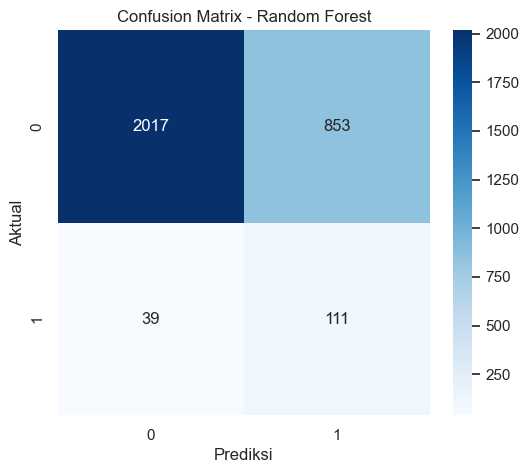

In [ ]:
# Confusion Matrix Random Forest

# Predict langsung pakai pipeline
y_pred = loaded_pipeline_rf15.predict(x_test)

# 3. Buat confusion matrix
cm = confusion_matrix(y_test, y_pred)

# 4. Plot heatmap
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.title("Confusion Matrix - Random Forest")
plt.show()

In [ ]:
# Metrik ROC AUC, Sensitivity & Specificity RAndom Forest

# Load pipeline, pisahkan antara preprocessor & model
pipeline    = joblib.load(saved_path_rf15)
preprocessor = pipeline.named_steps['preprocessing']
rf           = pipeline.named_steps['grid_search'].best_estimator_

# Ubah x_test menjadi fitur numerik saja
X_test_enc = preprocessor.transform(x_test)

# Prediksi
y_prob = rf.predict_proba(X_test_enc)[:, 1]
y_pred = rf.predict(X_test_enc)

# Hitung metrik
roc_auc = roc_auc_score(y_test, y_prob)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

print(f"ROC AUC Score : {roc_auc:.4f}")
print(f"Sensitivity   : {sensitivity:.4f}")
print(f"Specificity   : {specificity:.4f}")


ROC AUC Score : 0.7957
Sensitivity   : 0.7400
Specificity   : 0.7028


<Figure size 800x600 with 0 Axes>

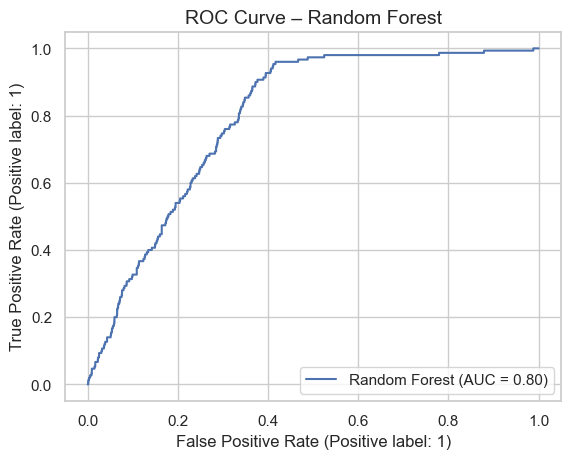

In [ ]:
# ROC Curve Random Forest

# Ambil preprocessing step dan best model dari GridSearchCV
preproc      = loaded_pipeline_rf15.named_steps['preprocessing']
grid_search  = loaded_pipeline_rf15.named_steps['grid_search']
best_model   = grid_search.best_estimator_

# Bangun pipeline inference (tanpa SMOTE)
infer = Pipeline([
    ('preprocessing', preproc),
    ('model',          best_model)
])

# Hitung probabilitas positif
y_prob = infer.predict_proba(x_test)[:, 1]

# Plot ROC Curve
plt.figure(figsize=(8, 6))
RocCurveDisplay.from_predictions(
    y_test,
    y_prob,
    name="Random Forest",
    pos_label=1
)
plt.title("ROC Curve – Random Forest", fontsize=14)
plt.show()

In [ ]:
# Iterasi Simulasi 10x Random Forest

# Muat kembali pipeline GridSearch (yang berisi 'grid_search' step) —
# Misalnya Anda menyimpannya sebagai 'grid_pipeline':
import joblib
grid_pipeline = joblib.load(saved_path_rf15)              # pipeline asli
grid_search   = grid_pipeline.named_steps['grid_search']
best_params   = grid_search.best_params_              # ← ambil BEST PARAM sebelum override

# Siapkan list untuk mengumpulkan metrik —
roc_auc_list     = []
specificity_list = []
sensitivity_list = []

# Loop 10 kali dengan pipeline fresh setiap iterasi —
for i in range(1, 11):
    # a) Buat ulang RandomForestClassifier pakai best_params
    model_rf = RandomForestClassifier(criterion='entropy', **best_params)
    pipeline = ImbPipeline([
        ('preprocessing', preprocessing),           # gunakan pipeline preprocessing Anda
        ('oversampling',   SMOTE(random_state=1)),  # SMOTE hanya di training
        ('model',          model_rf)
    ])
    
    # b) Fit di training
    pipeline.fit(x_train, y_train)
    
    # c) Predict & prob di test
    y_pred = pipeline.predict(x_test)
    y_prob = pipeline.predict_proba(x_test)[:, 1]
    
    # d) Hitung ROC-AUC
    roc = roc_auc_score(y_test, y_prob)
    roc_auc_list.append(roc)
    
    # e) Hitung specificity & sensitivity
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    spec = tn / (tn + fp) if (tn + fp) else 0
    sens = tp / (tp + fn) if (tp + fn) else 0
    specificity_list.append(spec)
    sensitivity_list.append(sens)
    
    # f) Tampilkan hasil iterasi
    print(f"Iteration {i:2d}  —  ROC AUC: {roc:.4f},  Spec: {spec:.4f},  Sens: {sens:.4f}")

# Rata-rata dan Std Deviasi —
roc_mean  = np.mean(roc_auc_list)
roc_std   = np.std(roc_auc_list, ddof=1)
spec_mean = np.mean(specificity_list)
spec_std  = np.std(specificity_list, ddof=1)
sens_mean = np.mean(sensitivity_list)
sens_std  = np.std(sensitivity_list, ddof=1)

print("\n" + "—"*50)
print("Rata-rata ± Std.Dev (10 iterasi):")
print(f"ROC AUC     : {roc_mean:.4f} ± {roc_std:.4f}")
print(f"Specificity : {spec_mean:.4f} ± {spec_std:.4f}")
print(f"Sensitivity : {sens_mean:.4f} ± {sens_std:.4f}")


c:\Users\trian\AppData\Local\Programs\Python\Python310\.conda\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Iteration  1  —  ROC AUC: 0.7950,  Spec: 0.7066,  Sens: 0.7200


c:\Users\trian\AppData\Local\Programs\Python\Python310\.conda\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Iteration  2  —  ROC AUC: 0.7975,  Spec: 0.7017,  Sens: 0.7533


c:\Users\trian\AppData\Local\Programs\Python\Python310\.conda\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Iteration  3  —  ROC AUC: 0.7946,  Spec: 0.6962,  Sens: 0.7133


c:\Users\trian\AppData\Local\Programs\Python\Python310\.conda\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Iteration  4  —  ROC AUC: 0.7925,  Spec: 0.7070,  Sens: 0.7067


c:\Users\trian\AppData\Local\Programs\Python\Python310\.conda\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Iteration  5  —  ROC AUC: 0.7969,  Spec: 0.7003,  Sens: 0.7400


c:\Users\trian\AppData\Local\Programs\Python\Python310\.conda\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Iteration  6  —  ROC AUC: 0.7946,  Spec: 0.7077,  Sens: 0.7333


c:\Users\trian\AppData\Local\Programs\Python\Python310\.conda\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Iteration  7  —  ROC AUC: 0.7944,  Spec: 0.6986,  Sens: 0.7267


c:\Users\trian\AppData\Local\Programs\Python\Python310\.conda\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Iteration  8  —  ROC AUC: 0.7953,  Spec: 0.7035,  Sens: 0.7267


c:\Users\trian\AppData\Local\Programs\Python\Python310\.conda\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Iteration  9  —  ROC AUC: 0.7933,  Spec: 0.7118,  Sens: 0.7000


c:\Users\trian\AppData\Local\Programs\Python\Python310\.conda\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Iteration 10  —  ROC AUC: 0.7942,  Spec: 0.7035,  Sens: 0.7267

——————————————————————————————————————————————————
Rata-rata ± Std.Dev (10 iterasi):
ROC AUC     : 0.7948 ± 0.0015
Specificity : 0.7037 ± 0.0047
Sensitivity : 0.7247 ± 0.0157


## XGBOOST

### Model

In [ ]:
# Training Model XGBoost

param_xgb = {'max_depth': np.arange(5, 10),
             'eta': [0.01, 0.05, 0.1, 0.15, 0.2],
             'gamma': [0, 0.1, 1, 3, 5],
             'lambda': [0, 0.1, 0.2, 1, 5]}

xgb_grid = GridSearchCV(XGBClassifier(n_estimators=250,
                                      subsample=0.8,
                                      objective='binary:logistic',
                                      eval_metric='logloss'),
                        param_grid=param_xgb, cv=5, scoring ='roc_auc', n_jobs=-1)

xgb_pipeline = ImbPipeline([('preprocessing', preprocessing),
                            ('oversampling', SMOTE(random_state=1)),
                            ('grid_search', xgb_grid)])

xgb_pipeline.fit(x_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['Age', 'Deductible',
                                                   'DriverRating',
                                                   'PoliceReportFiled',
                                                   'WitnessPresent']),
                                                 ('ord',
                                                  Pipeline(steps=[('ord_enc',
                                                                   OrdinalEncoder(categories=[['less '
                                                                                               'than '
                                                                                               '20000',
                                                                                               '20000 '
                                                                                               'to '
                                                                                               '29000',
                                                                                               '30000 '
                                                                                               'to '
                                                                                               '39000',
                                                                                               '40000 '
                                                                                               'to '
                                                                                               '59000',
                                                                                               '60000 '
                                                                                               'to '
                                                                                               '69000',
                                                                                               'm...
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=250,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=None, ...),
                              n_jobs=-1,
                              param_grid={'eta': [0.01, 0.05, 0.1, 0.15, 0.2],
                                          'gamma': [0, 0.1, 1, 3, 5],
                                          'lambda': [0, 0.1, 0.2, 1, 5],
                                          'max_depth': array([5, 6, 7, 8, 9])},
                              scoring='roc_auc'))])

**Menyimpan Model**

In [ ]:
# Menyimpan Model XGBoost
import joblib
import os
from datetime import datetime

def save_full_pipeline(pipeline, model_name="xgb15_full_pipeline", models_dir="xgb15_models"):
    """
    Simpan seluruh pipeline (preprocessing, oversampling, grid_search/model) 
    sebagai satu file .pkl yang bisa langsung di-load kembali.
    """
    os.makedirs(models_dir, exist_ok=True)
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    filename = f"{models_dir}/{model_name}_{timestamp}.pkl"
    joblib.dump(pipeline, filename)
    print(f"✅ Full pipeline saved to: {filename}")
    return filename

# Contoh pemakaian, setelah kamu .fit(xgb15_pipeline, x_train, y_train):
saved_path_xgb15 = save_full_pipeline(xgb_pipeline, model_name="xgb15_gridsearch_full")


✅ Full pipeline saved to: xgb15_models/xgb15_gridsearch_full_20250527_013226.pkl


In [ ]:
# Menampilkan hyperparameter terbaik XGBoost
import joblib

# Load seluruh pipeline
loaded_pipeline_xgb15 = joblib.load(saved_path_xgb15)

# Akses GridSearchCV di dalam pipeline
gs = loaded_pipeline_xgb15.named_steps['grid_search']

# Ambil dan print best hyperparameters
best_params = gs.best_params_
print("Best hyperparameters:", best_params)


Best hyperparameters: {'eta': 0.05, 'gamma': 0.1, 'lambda': 1, 'max_depth': 9}


In [193]:
# Ambil hasil CV dari GridSearchCV
cv_results = loaded_pipeline_xgb15.named_steps['grid_search'].cv_results_

# 3) Tampilkan sebagai DataFrame dan sortir berdasarkan rank_test_score
pd.DataFrame(cv_results).sort_values("rank_test_score", ascending=True)

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_eta  \
169      13.864983      0.565691         0.162400        0.008043      0.05   
139      13.906394      0.507378         0.161705        0.007452      0.05   
144      14.079776      0.461924         0.159201        0.006178      0.05   
154      13.876090      0.334145         0.154800        0.004490      0.05   
134      13.833761      0.278664         0.160599        0.007941      0.05   
..             ...           ...              ...             ...       ...   
20        7.659273      0.102754         0.095399        0.002870      0.01   
45        7.796254      0.061034         0.097797        0.002138      0.01   
120       7.495164      0.084940         0.094201        0.002714      0.01   
70        7.675667      0.053415         0.094601        0.001356      0.01   
95        7.430950      0.131398         0.093599        0.003135      0.01   

    param_gamma param_lambda param_max_depth  \
169         0.1            1               9   
139           0          0.2               9   
144           0            1               9   
154         0.1            0               9   
134           0          0.1               9   
..          ...          ...             ...   
20            0            5               5   
45          0.1            5               5   
120           5            5               5   
70            1            5               5   
95            3            5               5   

                                                params  split0_test_score  \
169  {'eta': 0.05, 'gamma': 0.1, 'lambda': 1, 'max_...           0.962701   
139  {'eta': 0.05, 'gamma': 0, 'lambda': 0.2, 'max_...           0.962546   
144  {'eta': 0.05, 'gamma': 0, 'lambda': 1, 'max_de...           0.962459   
154  {'eta': 0.05, 'gamma': 0.1, 'lambda': 0, 'max_...           0.962316   
134  {'eta': 0.05, 'gamma': 0, 'lambda': 0.1, 'max_...           0.962274   
..                                                 ...                ...   
20   {'eta': 0.01, 'gamma': 0, 'lambda': 5, 'max_de...           0.936596   
45   {'eta': 0.01, 'gamma': 0.1, 'lambda': 5, 'max_...           0.936453   
120  {'eta': 0.01, 'gamma': 5, 'lambda': 5, 'max_de...           0.936025   
70   {'eta': 0.01, 'gamma': 1, 'lambda': 5, 'max_de...           0.936921   
95   {'eta': 0.01, 'gamma': 3, 'lambda': 5, 'max_de...           0.936400   

     split1_test_score  split2_test_score  split3_test_score  \
169           0.999954           0.999729           0.999869   
139           0.999936           0.999748           0.999870   
144           0.999935           0.999714           0.999867   
154           0.999942           0.999783           0.999899   
134           0.999946           0.999795           0.999879   
..                 ...                ...                ...   
20            0.984026           0.980227           0.977540   
45            0.984011           0.980246           0.977383   
120           0.983815           0.980248           0.978182   
70            0.983833           0.980220           0.977550   
95            0.983993           0.979997           0.977795   

     split4_test_score  mean_test_score  std_test_score  rank_test_score  
169           0.999907         0.992432        0.014865                1  
139           0.999906         0.992401        0.014928                2  
144           0.999900         0.992375        0.014958                3  
154           0.999920         0.992372        0.015028                4  
134           0.999899         0.992359        0.015042                5  
..                 ...              ...             ...              ...  
20            0.979970         0.971672        0.017660              621  
45            0.979974         0.971613        0.017707              622  
120           0.979623         0.971578        0.017873              623  
70            0.979321         0.97

### Statistical Performances

In [ ]:
# Statistik Performa XGBoost

# prediksi langsung pake pipeline:
y_pred = loaded_pipeline_xgb15.predict(x_test)
y_prob = loaded_pipeline_xgb15.predict_proba(x_test)[:, 1]

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      2870
           1       0.36      0.07      0.11       150

    accuracy                           0.95      3020
   macro avg       0.66      0.53      0.54      3020
weighted avg       0.92      0.95      0.93      3020



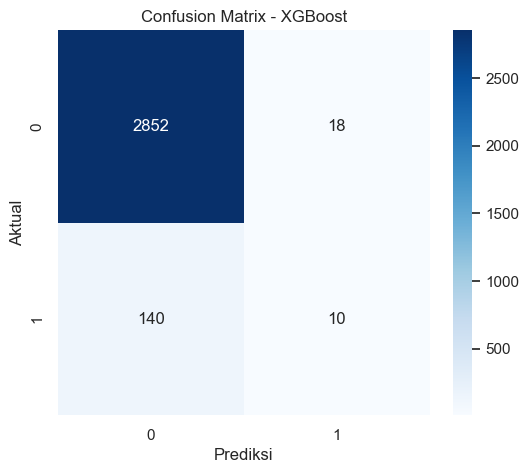

In [ ]:
# Confusion Matrix XGBoost

# Predict langsung pakai pipeline
y_pred = loaded_pipeline_xgb15.predict(x_test)

# 3. Buat confusion matrix
cm = confusion_matrix(y_test, y_pred)

# 4. Plot heatmap
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.title("Confusion Matrix - XGBoost")
plt.show()

In [ ]:
# Metrik ROC AUC, Sensitivity & Specificity XGBoost

# Load pipeline, pisahkan antara preprocessor & model
pipeline    = joblib.load(saved_path_xgb15)
preprocessor = pipeline.named_steps['preprocessing']
xgb           = pipeline.named_steps['grid_search'].best_estimator_

# Ubah x_test menjadi fitur numerik saja
X_test_enc = preprocessor.transform(x_test)

# Prediksi
y_prob = xgb.predict_proba(X_test_enc)[:, 1]
y_pred = xgb.predict(X_test_enc)

# Hitung metrik
roc_auc = roc_auc_score(y_test, y_prob)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

print(f"ROC AUC Score : {roc_auc:.4f}")
print(f"Sensitivity   : {sensitivity:.4f}")
print(f"Specificity   : {specificity:.4f}")


ROC AUC Score : 0.8053
Sensitivity   : 0.0667
Specificity   : 0.9937


<Figure size 800x600 with 0 Axes>

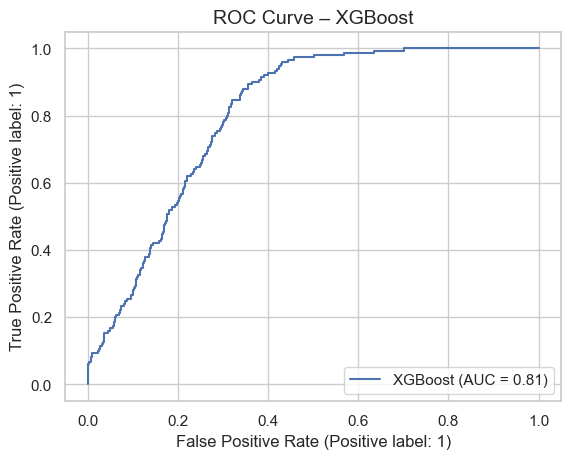

In [ ]:
# ROC Curve XGBoost

# Ambil preprocessing step dan best model dari GridSearchCV
preproc      = loaded_pipeline_xgb15.named_steps['preprocessing']
grid_search  = loaded_pipeline_xgb15.named_steps['grid_search']
best_model   = grid_search.best_estimator_

# Bangun pipeline inference (tanpa SMOTE)
infer = Pipeline([
    ('preprocessing', preproc),
    ('model',          best_model)
])

# Hitung probabilitas positif
y_prob = infer.predict_proba(x_test)[:, 1]

# Plot ROC Curve
plt.figure(figsize=(8, 6))
RocCurveDisplay.from_predictions(
    y_test,
    y_prob,
    name="XGBoost",
    pos_label=1
)
plt.title("ROC Curve – XGBoost", fontsize=14)
plt.show()

In [ ]:
# Iterasi simulasi 10x XGBoost

# Muat kembali pipeline GridSearch (yang berisi 'grid_search' step) —
# Misalnya Anda menyimpannya sebagai 'grid_pipeline':
import joblib
grid_pipeline = joblib.load(saved_path_xgb15)              # pipeline asli
grid_search   = grid_pipeline.named_steps['grid_search']
best_params   = grid_search.best_params_              # ← ambil BEST PARAM sebelum override

# Siapkan list untuk mengumpulkan metrik —
roc_auc_list     = []
specificity_list = []
sensitivity_list = []

# Loop 10 kali dengan pipeline fresh setiap iterasi —
for i in range(1, 11):
    # a) Buat ulang XGBClassifier pakai best_params
    model_xgb = XGBClassifier(criterion='entropy', **best_params)
    pipeline = ImbPipeline([
        ('preprocessing', preprocessing),           # gunakan pipeline preprocessing Anda
        ('oversampling',   SMOTE(random_state=1)),  # SMOTE hanya di training
        ('model',          model_xgb)
    ])
    
    # b) Fit di training
    pipeline.fit(x_train, y_train)
    
    # c) Predict & prob di test
    y_pred = pipeline.predict(x_test)
    y_prob = pipeline.predict_proba(x_test)[:, 1]
    
    # d) Hitung ROC-AUC
    roc = roc_auc_score(y_test, y_prob)
    roc_auc_list.append(roc)
    
    # e) Hitung specificity & sensitivity
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    spec = tn / (tn + fp) if (tn + fp) else 0
    sens = tp / (tp + fn) if (tp + fn) else 0
    specificity_list.append(spec)
    sensitivity_list.append(sens)
    
    # f) Tampilkan hasil iterasi
    print(f"Iteration {i:2d}  —  ROC AUC: {roc:.4f},  Spec: {spec:.4f},  Sens: {sens:.4f}")

# Rata-rata dan Std Deviasi —
roc_mean  = np.mean(roc_auc_list)
roc_std   = np.std(roc_auc_list, ddof=1)
spec_mean = np.mean(specificity_list)
spec_std  = np.std(specificity_list, ddof=1)
sens_mean = np.mean(sensitivity_list)
sens_std  = np.std(sensitivity_list, ddof=1)

print("\n" + "—"*50)
print("Rata-rata ± Std.Dev (10 iterasi):")
print(f"ROC AUC     : {roc_mean:.4f} ± {roc_std:.4f}")
print(f"Specificity : {spec_mean:.4f} ± {spec_std:.4f}")
print(f"Sensitivity : {sens_mean:.4f} ± {sens_std:.4f}")


c:\Users\trian\AppData\Local\Programs\Python\Python310\.conda\lib\site-packages\xgboost\core.py:158: UserWarning: [01:32:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)


Iteration  1  —  ROC AUC: 0.8106,  Spec: 0.9822,  Sens: 0.1133


c:\Users\trian\AppData\Local\Programs\Python\Python310\.conda\lib\site-packages\xgboost\core.py:158: UserWarning: [01:32:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)


Iteration  2  —  ROC AUC: 0.8106,  Spec: 0.9822,  Sens: 0.1133


c:\Users\trian\AppData\Local\Programs\Python\Python310\.conda\lib\site-packages\xgboost\core.py:158: UserWarning: [01:32:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)


Iteration  3  —  ROC AUC: 0.8106,  Spec: 0.9822,  Sens: 0.1133


c:\Users\trian\AppData\Local\Programs\Python\Python310\.conda\lib\site-packages\xgboost\core.py:158: UserWarning: [01:32:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)


Iteration  4  —  ROC AUC: 0.8106,  Spec: 0.9822,  Sens: 0.1133


c:\Users\trian\AppData\Local\Programs\Python\Python310\.conda\lib\site-packages\xgboost\core.py:158: UserWarning: [01:32:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)


Iteration  5  —  ROC AUC: 0.8106,  Spec: 0.9822,  Sens: 0.1133


c:\Users\trian\AppData\Local\Programs\Python\Python310\.conda\lib\site-packages\xgboost\core.py:158: UserWarning: [01:32:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)


Iteration  6  —  ROC AUC: 0.8106,  Spec: 0.9822,  Sens: 0.1133


c:\Users\trian\AppData\Local\Programs\Python\Python310\.conda\lib\site-packages\xgboost\core.py:158: UserWarning: [01:32:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)


Iteration  7  —  ROC AUC: 0.8106,  Spec: 0.9822,  Sens: 0.1133


c:\Users\trian\AppData\Local\Programs\Python\Python310\.conda\lib\site-packages\xgboost\core.py:158: UserWarning: [01:32:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)


Iteration  8  —  ROC AUC: 0.8106,  Spec: 0.9822,  Sens: 0.1133


c:\Users\trian\AppData\Local\Programs\Python\Python310\.conda\lib\site-packages\xgboost\core.py:158: UserWarning: [01:32:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)


Iteration  9  —  ROC AUC: 0.8106,  Spec: 0.9822,  Sens: 0.1133


c:\Users\trian\AppData\Local\Programs\Python\Python310\.conda\lib\site-packages\xgboost\core.py:158: UserWarning: [01:32:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)


Iteration 10  —  ROC AUC: 0.8106,  Spec: 0.9822,  Sens: 0.1133

——————————————————————————————————————————————————
Rata-rata ± Std.Dev (10 iterasi):
ROC AUC     : 0.8106 ± 0.0000
Specificity : 0.9822 ± 0.0000
Sensitivity : 0.1133 ± 0.0000


## SURROGATE XGBOOST

In [ ]:
# Menentukan Prediksi XGBoost sebagai y_train Surrogate XGBoost
import joblib
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load kembali full‐pipeline XGBoost Anda
#    (preprocessing + SMOTE + GridSearchCV)
xgb_full = joblib.load(saved_path_xgb15)

# Ambil GridSearchCV dan best estimator (XGBClassifier)
gs = xgb_full.named_steps['grid_search']
best_xgb: XGBClassifier = gs.best_estimator_

# Siapkan inference‐pipeline tanpa SMOTE:
#    hanya preprocessing + best_xgb
infer_xgb = Pipeline([
    ('preprocessing', xgb_full.named_steps['preprocessing']),
    ('model',          best_xgb)
])

# Hitung prediksi XGB sebagai target surrogate:
#    a) hard labels
y_surr = infer_xgb.predict(x_train)

In [ ]:
# Training Model Surrogate XGBoost
param_sxgb = {'max_depth': np.arange(5, 10), 
            'min_samples_leaf': (50, 100, 150, 200, 250, 300, 350, 400, 450, 500),
            'min_samples_split': (50, 100, 150, 200, 250, 300, 350, 400, 450, 500)}

# Create pipelines with SMOTE for each model (nested GridSearchCV)
sxgb_grid = GridSearchCV(DecisionTreeClassifier(criterion='entropy'), param_grid=param_sxgb, scoring='roc_auc', cv=5) 

sxgb_pipeline = ImbPipeline([ 
    ('preprocessing', preprocessing),
    ('oversampling', SMOTE(random_state=1)),
    ('grid_search', sxgb_grid) 
])

sxgb_pipeline.fit(x_train, y_surr)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['Age', 'Deductible',
                                                   'DriverRating',
                                                   'PoliceReportFiled',
                                                   'WitnessPresent']),
                                                 ('ord',
                                                  Pipeline(steps=[('ord_enc',
                                                                   OrdinalEncoder(categories=[['less '
                                                                                               'than '
                                                                                               '20000',
                                                                                               '20000 '
                                                                                               'to '
                                                                                               '29000',
                                                                                               '30000 '
                                                                                               'to '
                                                                                               '39000',
                                                                                               '40000 '
                                                                                               'to '
                                                                                               '59000',
                                                                                               '60000 '
                                                                                               'to '
                                                                                               '69000',
                                                                                               'm...
                                                   'VehicleCategory',
                                                   'AgentType',
                                                   'BasePolicy'])])),
                ('oversampling', SMOTE(random_state=1)),
                ('grid_search',
                 GridSearchCV(cv=5,
                              estimator=DecisionTreeClassifier(criterion='entropy'),
                              param_grid={'max_depth': array([5, 6, 7, 8, 9]),
                                          'min_samples_leaf': (50, 100, 150,
                                                               200, 250, 300,
                                                               350, 400, 450,
                                                               500),
                                          'min_samples_split': (50, 100, 150,
                                                                200, 250, 300,
                                                                350, 400, 450,
                                                                500)},
                              scoring='roc_auc'))])

**Menyimpan Model**

In [ ]:
# Menyimpan Model Surrogate XGBoost
import joblib
import os
from datetime import datetime

def save_full_pipeline(pipeline, model_name="sxgb15_full_pipeline", models_dir="sxgb15_models"):
    """
    Simpan seluruh pipeline (preprocessing, oversampling, grid_search/model) 
    sebagai satu file .pkl yang bisa langsung di-load kembali.
    """
    os.makedirs(models_dir, exist_ok=True)
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    filename = f"{models_dir}/{model_name}_{timestamp}.pkl"
    joblib.dump(pipeline, filename)
    print(f"✅ Full pipeline saved to: {filename}")
    return filename

# Contoh pemakaian, setelah kamu .fit(sxgb_pipeline, x_train, y_train):
saved_path_sxgb15 = save_full_pipeline(sxgb_pipeline, model_name="sxgb15_gridsearch_full")


✅ Full pipeline saved to: sxgb15_models/sxgb15_gridsearch_full_20250527_014015.pkl


In [ ]:
# Menampilkan hyperparameter terbaik Surrogate XGBoost
import joblib

# Load seluruh pipeline
loaded_pipeline_sxgb15 = joblib.load(saved_path_sxgb15)

# Akses GridSearchCV di dalam pipeline
gs = loaded_pipeline_sxgb15.named_steps['grid_search']

# Ambil dan print best hyperparameters
best_params = gs.best_params_
print("Best hyperparameters:", best_params)


Best hyperparameters: {'max_depth': 9, 'min_samples_leaf': 50, 'min_samples_split': 100}


In [203]:
# Ambil hasil CV dari GridSearchCV
cv_results = loaded_pipeline_sxgb15.named_steps['grid_search'].cv_results_

# 3) Tampilkan sebagai DataFrame dan sortir berdasarkan rank_test_score
pd.DataFrame(cv_results).sort_values("rank_test_score", ascending=True)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
401       0.224894      0.006545         0.003979        0.000039   
400       0.213361      0.009980         0.003985        0.000035   
402       0.219490      0.004894         0.004397        0.000493   
403       0.228100      0.003949         0.004402        0.000490   
404       0.211832      0.005750         0.004005        0.000631   
..             ...           ...              ...             ...   
56        0.156426      0.003850         0.004001        0.000003   
57        0.144998      0.007712         0.003590        0.000475   
58        0.157797      0.001166         0.004402        0.000799   
59        0.150026      0.005237         0.003993        0.000631   
51        0.153398      0.003612         0.003802        0.000401   

    param_max_depth param_min_samples_leaf param_min_samples_split  \
401               9                     50                     100   
400               9                     50                      50   
402               9                     50                     150   
403               9                     50                     200   
404               9                     50                     250   
..              ...                    ...                     ...   
56                5                    300                     350   
57                5                    300                     400   
58                5                    300                     450   
59                5                    300                     500   
51                5                    300                     100   

                                                params  split0_test_score  \
401  {'max_depth': 9, 'min_samples_leaf': 50, 'min_...           0.969543   
400  {'max_depth': 9, 'min_samples_leaf': 50, 'min_...           0.969548   
402  {'max_depth': 9, 'min_samples_leaf': 50, 'min_...           0.969259   
403  {'max_depth': 9, 'min_samples_leaf': 50, 'min_...           0.968717   
404  {'max_depth': 9, 'min_samples_leaf': 50, 'min_...           0.967818   
..                                                 ...                ...   
56   {'max_depth': 5, 'min_samples_leaf': 300, 'min...           0.910214   
57   {'max_depth': 5, 'min_samples_leaf': 300, 'min...           0.910214   
58   {'max_depth': 5, 'min_samples_leaf': 300, 'min...           0.910214   
59   {'max_depth': 5, 'min_samples_leaf': 300, 'min...           0.910214   
51   {'max_depth': 5, 'min_samples_leaf': 300, 'min...           0.910214   

     split1_test_score  split2_test_score  split3_test_score  \
401           0.980661           0.980752           0.979869   
400           0.980551           0.980764           0.979869   
402           0.980008           0.980205           0.979442   
403           0.979660           0.979442           0.977693   
404           0.977831           0.979236           0.976366   
..                 ...                ...                ...   
56            0.916505           0.910783           0.911554   
57            0.916505           0.910783           0.911554   
58            0.916505           0.910783           0.911554   
59            0.916505           0.910783           0.911554   
51            0.916505           0.910783           0.911554   

     split4_test_score  mean_test_score  std_test_score  rank_test_score  
401           0.978093         0.977784        0.004229                1  
400           0.978093         0.977765        0.004215                2  
402           0.977426         0.977268        0.004124                3  
403           0.976564         0.976415        0.004015                4  
404           0.975095         0.975269        0.003976                5  
..                 ...              ...             ...              ...  
56            0.908132         0.911438        0.002776              491  
57            0.908132         0.911438  

**Menampilkan Rules dan Tree**

Model yang akan diplot: <class 'sklearn.tree._classes.DecisionTreeClassifier'>
Pohon disimpan di: surrogate_xgboost_15_tree_large.png


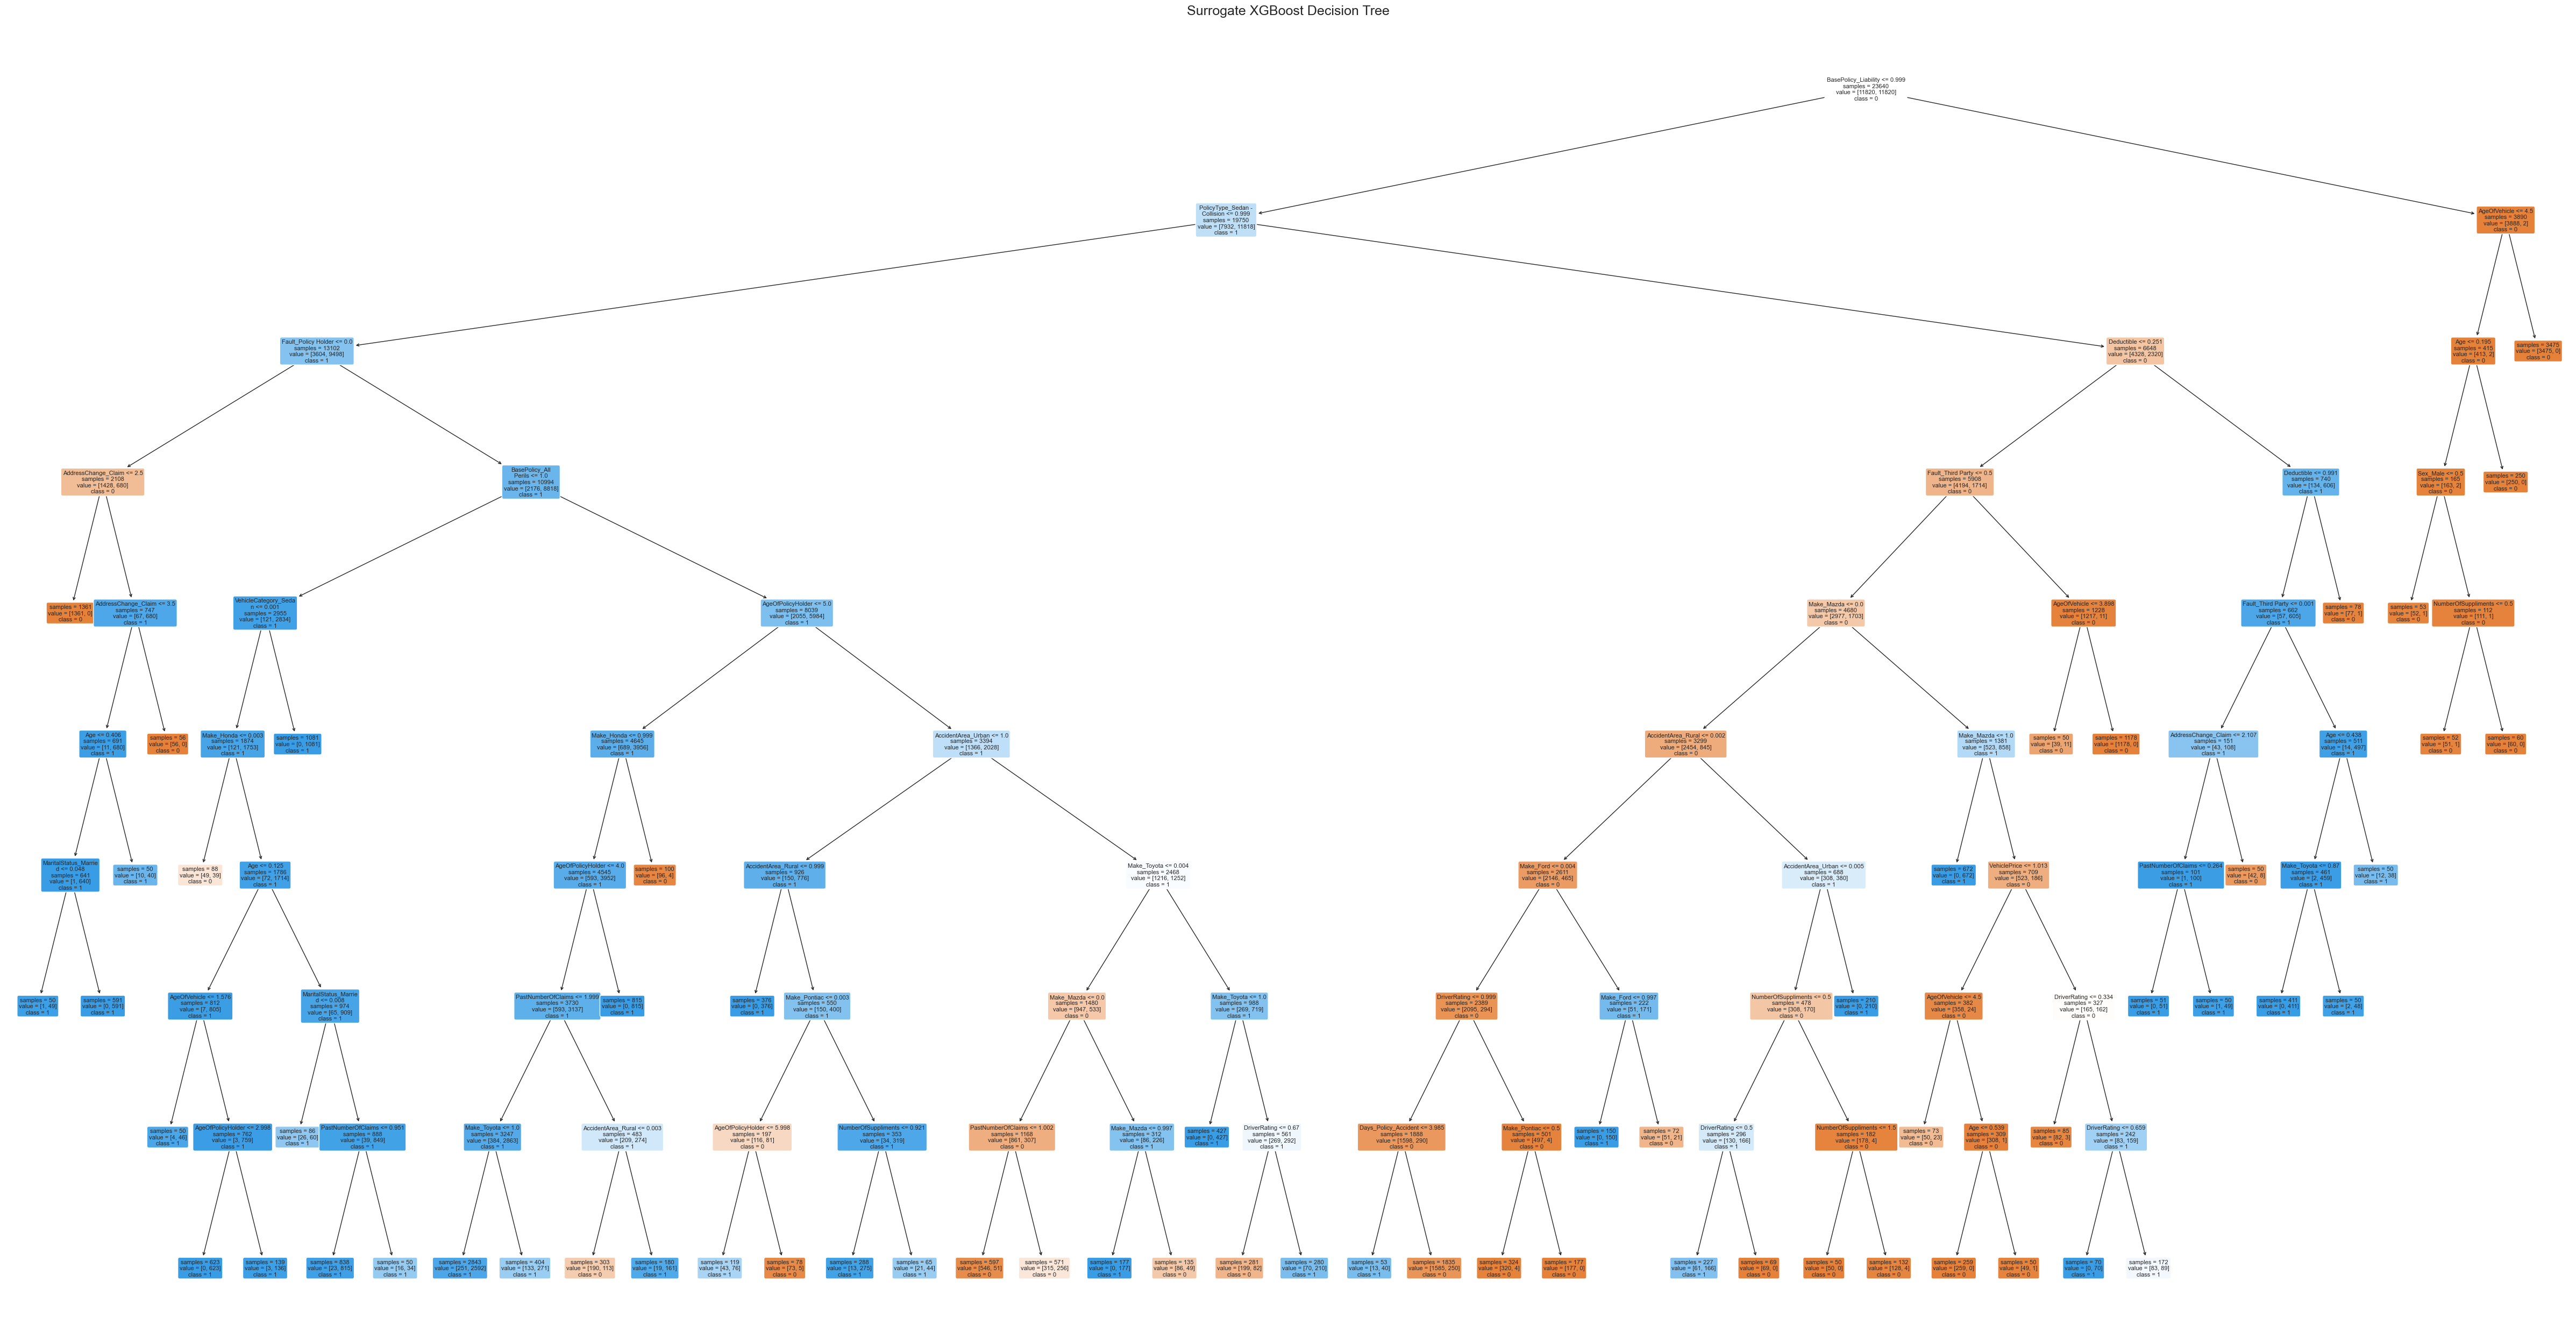

In [ ]:
# Menampilkan Tree dan Fule Rule Set Surrogate XGBoost
import joblib
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree, DecisionTreeClassifier
import textwrap

# ---------------------------
# 1) Muat pipeline & extract model DecisionTreeClassifier
# ---------------------------

# Ganti dengan path yang sesuai:
saved_path = "sxgb15_models/sxgb15_gridsearch_full_20250527_014015.pkl"
pipeline = joblib.load(saved_path)

# Ambil estimator dari GridSearchCV / pipeline
if "grid_search" in pipeline.named_steps:
    gs = pipeline.named_steps["grid_search"]
    estimator = gs.best_estimator_
else:
    estimator = pipeline

# Jika estimator itu pipeline, coba unwrap step 'model' atau langsung DecisionTreeClassifier
if hasattr(estimator, "named_steps"):
    # misal step bernama 'model' atau 'estimator'
    if "model" in estimator.named_steps:
        model = estimator.named_steps["model"]
    elif "estimator" in estimator.named_steps:
        model = estimator.named_steps["estimator"]
    else:
        # Jika tidak ada step jelas, asumsikan pipeline akhir adalah DecisionTreeClassifier
        # Mungkin pipeline: preprocessing -> SMOTE -> classifier
        # Jika classifier di step terakhir:
        last_step = list(estimator.named_steps.keys())[-1]
        cand = estimator.named_steps[last_step]
        if isinstance(cand, DecisionTreeClassifier):
            model = cand
        else:
            model = cand  # gunakan apa adanya, meski bukan DecisionTreeClassifier
else:
    model = estimator

# Jika model masih wrapper, misal memiliki attribute estimator_
if not isinstance(model, DecisionTreeClassifier) and hasattr(model, "estimator_"):
    inner = getattr(model, "estimator_")
    if isinstance(inner, DecisionTreeClassifier):
        model = inner

print(f"Model yang akan diplot: {type(model)}")

# ---------------------------
# 2) Ambil nama fitur hasil preprocessing
# ---------------------------
feature_names = None
if "preprocessing" in pipeline.named_steps:
    preproc = pipeline.named_steps["preprocessing"]
    try:
        raw_names = preproc.get_feature_names_out()  # misal ['num__Age', 'cat__incident_severity_Major Damage', ...]
        # Bersihkan prefix 'num__' atau 'cat__'
        feature_names = [n.split("__", 1)[-1] for n in raw_names]
    except Exception as e:
        print("Peringatan: gagal ambil feature_names:", e)
        feature_names = None

if feature_names is None:
    # Jika gagal, Anda perlu mendefinisikan manual sesuai urutan kolom input model
    print("Warning: feature_names is None. Harap set manual list feature_names.")
    feature_names = None

# ---------------------------
# 3) Wrap nama fitur agar multi-line
# ---------------------------
def wrap_name(name, width=20):
    """
    Membungkus nama fitur menjadi beberapa baris maksimal width karakter per baris.
    Mengembalikan string multi-line '\n' jika perlu.
    """
    # textwrap.wrap akan memecah di spasi, underscore, dll.
    lines = textwrap.wrap(name, width=width)
    if not lines:
        return name
    return "\n".join(lines)

if feature_names is not None:
    # Atur width sesuai panjang rata-rata; misal 15–25 karakter
    feature_names_wrapped = [wrap_name(n, width=20) for n in feature_names]
else:
    feature_names_wrapped = None

# ---------------------------
# 4) Plot pohon
# ---------------------------
# Atur figsize besar untuk menghindari tabrakan:
fig_width = 48  # coba 30 atau lebih jika masih tabrakan
fig_height = 25  # tinggi menyesuaikan depth
plt.figure(figsize=(fig_width, fig_height))

plot_tree(
    model,
    feature_names=feature_names_wrapped,
    class_names=[str(c) for c in model.classes_] if hasattr(model, "classes_") else None,
    filled=True,
    rounded=True,
    impurity=False,
    proportion=False,
    label="all",
    fontsize=8,    # kecilkan font jika banyak node
    precision=3,   # presisi threshold
    # max_depth=None  # default None: tampilkan semua level
)

plt.title("Surrogate XGBoost Decision Tree", fontsize=18, pad=12)
plt.tight_layout()

# Jika ingin margin ekstra, bisa pakai plt.subplots_adjust:
# plt.subplots_adjust(left=0.01, right=0.99, top=0.9, bottom=0.1)

# Simpan ke file:
out_file = "surrogate_xgboost_15_tree_large.png"
plt.savefig(out_file, dpi=300, bbox_inches="tight")
print(f"Pohon disimpan di: {out_file}")

plt.show()

# ---------------------------
# 5) Jika masih tabrakan:
#   - Tambah fig_width jadi 40, 50; atau naikkan fig_height.
#   - Kecilkan fontsize menjadi 6 atau 7.
#   - Kurangi width wrap, misal width=15 agar baris lebih pendek.
#   - Pertimbangkan plot sebagian subtree dengan max_depth < full depth.
# ---------------------------


In [37]:
from sklearn.tree import export_text
rules = export_text(model, feature_names=feature_names, show_weights=False, spacing=2, decimals=4)
print(rules)


|-- BasePolicy_Liability <= 0.9988
|  |-- PolicyType_Sedan - Collision <= 0.9992
|  |  |-- Fault_Policy Holder <= 0.0000
|  |  |  |-- AddressChange_Claim <= 2.5000
|  |  |  |  |-- class: 0
|  |  |  |-- AddressChange_Claim >  2.5000
|  |  |  |  |-- AddressChange_Claim <= 3.5000
|  |  |  |  |  |-- Age <= 0.4057
|  |  |  |  |  |  |-- MaritalStatus_Married <= 0.0484
|  |  |  |  |  |  |  |-- class: 1
|  |  |  |  |  |  |-- MaritalStatus_Married >  0.0484
|  |  |  |  |  |  |  |-- class: 1
|  |  |  |  |  |-- Age >  0.4057
|  |  |  |  |  |  |-- class: 1
|  |  |  |  |-- AddressChange_Claim >  3.5000
|  |  |  |  |  |-- class: 0
|  |  |-- Fault_Policy Holder >  0.0000
|  |  |  |-- BasePolicy_All Perils <= 0.9999
|  |  |  |  |-- VehicleCategory_Sedan <= 0.0012
|  |  |  |  |  |-- Make_Honda <= 0.0026
|  |  |  |  |  |  |-- class: 0
|  |  |  |  |  |-- Make_Honda >  0.0026
|  |  |  |  |  |  |-- Age <= 0.1249
|  |  |  |  |  |  |  |-- AgeOfVehicle <= 1.5760
|  |  |  |  |  |  |  |  |-- class: 1
|  |  |  |

### Statistical Performances

In [ ]:
# Statistik Performa Surrogate XGBoost

# prediksi langsung pake pipeline:
y_pred = loaded_pipeline_sxgb15.predict(x_test)
y_prob = loaded_pipeline_sxgb15.predict_proba(x_test)[:, 1]

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.93      0.95      2870
           1       0.17      0.25      0.20       150

    accuracy                           0.90      3020
   macro avg       0.56      0.59      0.57      3020
weighted avg       0.92      0.90      0.91      3020



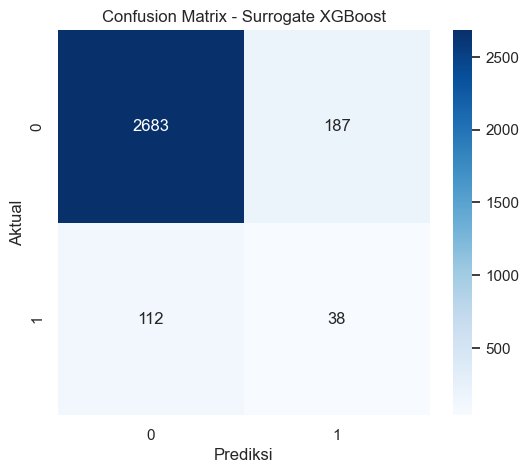

In [ ]:
# Confusion Matrix Surrogate XGBoost

# Predict langsung pakai pipeline
y_pred = loaded_pipeline_sxgb15.predict(x_test)

# 3. Buat confusion matrix
cm = confusion_matrix(y_test, y_pred)

# 4. Plot heatmap
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.title("Confusion Matrix - Surrogate XGBoost")
plt.show()

In [ ]:
# Metrik ROC AUC, Sensitivity & Specificity Surrogate XGBoost

# Load pipeline, pisahkan antara preprocessor & model
pipeline    = joblib.load(saved_path_sxgb15)
preprocessor = pipeline.named_steps['preprocessing']
sxgb         = pipeline.named_steps['grid_search'].best_estimator_

# Ubah x_test menjadi fitur numerik saja
X_test_enc = preprocessor.transform(x_test)

# Prediksi
y_prob = sxgb.predict_proba(X_test_enc)[:, 1]
y_pred = sxgb.predict(X_test_enc)

# Hitung metrik
roc_auc = roc_auc_score(y_test, y_prob)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

print(f"ROC AUC Score : {roc_auc:.4f}")
print(f"Sensitivity   : {sensitivity:.4f}")
print(f"Specificity   : {specificity:.4f}")


ROC AUC Score : 0.7784
Sensitivity   : 0.2533
Specificity   : 0.9348


<Figure size 800x600 with 0 Axes>

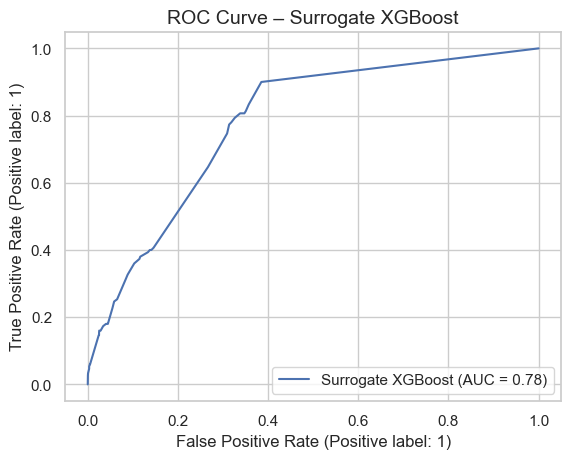

In [ ]:
# ROC Curve Surrogate XGBoost

# Ambil preprocessing step dan best model dari GridSearchCV
preproc      = loaded_pipeline_sxgb15.named_steps['preprocessing']
grid_search  = loaded_pipeline_sxgb15.named_steps['grid_search']
best_model   = grid_search.best_estimator_

# Bangun pipeline inference (tanpa SMOTE)
infer = Pipeline([
    ('preprocessing', preproc),
    ('model',          best_model)
])

# Hitung probabilitas positif
y_prob = infer.predict_proba(x_test)[:, 1]

# Plot ROC Curve
plt.figure(figsize=(8, 6))
RocCurveDisplay.from_predictions(
    y_test,
    y_prob,
    name="Surrogate XGBoost",
    pos_label=1
)
plt.title("ROC Curve – Surrogate XGBoost", fontsize=14)
plt.show()

In [ ]:
# Iterasi simulasi 10x Surrogate XGBoost

# Muat kembali pipeline GridSearch (yang berisi 'grid_search' step) —
# Misalnya Anda menyimpannya sebagai 'grid_pipeline':
import joblib
grid_pipeline = joblib.load(saved_path_sxgb15)              # pipeline asli
grid_search   = grid_pipeline.named_steps['grid_search']
best_params   = grid_search.best_params_              # ← ambil BEST PARAM sebelum override

# Siapkan list untuk mengumpulkan metrik —
roc_auc_list     = []
specificity_list = []
sensitivity_list = []

# Loop 10 kali dengan pipeline fresh setiap iterasi —
for i in range(1, 11):
    # a) Buat ulang DecisionTreeClassifier pakai best_params
    model_sxgb = DecisionTreeClassifier(criterion='entropy', **best_params)
    pipeline = ImbPipeline([
        ('preprocessing', preprocessing),           # gunakan pipeline preprocessing Anda
        ('oversampling', SMOTE(random_state=1)),
        ('model',          model_sxgb)
    ])
    
    # b) Fit di training
    pipeline.fit(x_train, y_surr)
    
    # c) Predict & prob di test
    y_pred = pipeline.predict(x_test)
    y_prob = pipeline.predict_proba(x_test)[:, 1]
    
    # d) Hitung ROC-AUC
    roc = roc_auc_score(y_test, y_prob)
    roc_auc_list.append(roc)
    
    # e) Hitung specificity & sensitivity
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    spec = tn / (tn + fp) if (tn + fp) else 0
    sens = tp / (tp + fn) if (tp + fn) else 0
    specificity_list.append(spec)
    sensitivity_list.append(sens)
    
    # f) Tampilkan hasil iterasi
    print(f"Iteration {i:2d}  —  ROC AUC: {roc:.4f},  Spec: {spec:.4f},  Sens: {sens:.4f}")

# Rata-rata dan Std Deviasi —
roc_mean  = np.mean(roc_auc_list)
roc_std   = np.std(roc_auc_list, ddof=1)
spec_mean = np.mean(specificity_list)
spec_std  = np.std(specificity_list, ddof=1)
sens_mean = np.mean(sensitivity_list)
sens_std  = np.std(sensitivity_list, ddof=1)

print("\n" + "—"*50)
print("Rata-rata ± Std.Dev (10 iterasi):")
print(f"ROC AUC     : {roc_mean:.4f} ± {roc_std:.4f}")
print(f"Specificity : {spec_mean:.4f} ± {spec_std:.4f}")
print(f"Sensitivity : {sens_mean:.4f} ± {sens_std:.4f}")


Iteration  1  —  ROC AUC: 0.7784,  Spec: 0.9348,  Sens: 0.2533
Iteration  2  —  ROC AUC: 0.7784,  Spec: 0.9348,  Sens: 0.2533
Iteration  3  —  ROC AUC: 0.7784,  Spec: 0.9348,  Sens: 0.2533
Iteration  4  —  ROC AUC: 0.7784,  Spec: 0.9348,  Sens: 0.2533
Iteration  5  —  ROC AUC: 0.7784,  Spec: 0.9348,  Sens: 0.2533
Iteration  6  —  ROC AUC: 0.7785,  Spec: 0.9348,  Sens: 0.2533
Iteration  7  —  ROC AUC: 0.7784,  Spec: 0.9348,  Sens: 0.2533
Iteration  8  —  ROC AUC: 0.7785,  Spec: 0.9348,  Sens: 0.2533
Iteration  9  —  ROC AUC: 0.7785,  Spec: 0.9348,  Sens: 0.2533
Iteration 10  —  ROC AUC: 0.7785,  Spec: 0.9348,  Sens: 0.2533

——————————————————————————————————————————————————
Rata-rata ± Std.Dev (10 iterasi):
ROC AUC     : 0.7784 ± 0.0001
Specificity : 0.9348 ± 0.0000
Sensitivity : 0.2533 ± 0.0000


## XGBOOST DEPTH 2

### Model

In [ ]:
# Training Model XGBoost Depth 2

from piml.models.xgb2 import XGB2Classifier
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline  # Corrected import statement
from imblearn.over_sampling import SMOTE
import numpy as np
from sklearn.preprocessing import FunctionTransformer


# Define the parameter grid for GridSearchCV
param_xgb2 = {'eta': [0.01, 0.05, 0.1, 0.15, 0.2],
              'gamma': [0, 0.1, 1, 3, 5],
              'reg_lambda': [0, 0.1, 0.2, 1, 5]}

# Create the XGB2Classifier model
xgb2_model = XGB2Classifier(n_estimators=250, tree_method="hist")

# Setup the GridSearchCV
xgb2_grid = GridSearchCV(estimator=xgb2_model,
                        param_grid=param_xgb2,
                        cv=5,
                        scoring='roc_auc',
                        n_jobs=-1)

# Create a pipeline with preprocessing, oversampling, and grid search
xgb2_pipeline = ImbPipeline([
    ('preprocessing', preprocessing),
    ('oversampling', SMOTE(random_state=1)),
    ('dense', FunctionTransformer(lambda x: x.toarray() if hasattr(x, "toarray") else x, validate=False)),
    ('grid_search', xgb2_grid)
])

# Fit the pipeline
xgb2_pipeline.fit(x_train, y_train)


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['Age', 'Deductible',
                                                   'DriverRating',
                                                   'PoliceReportFiled',
                                                   'WitnessPresent']),
                                                 ('ord',
                                                  Pipeline(steps=[('ord_enc',
                                                                   OrdinalEncoder(categories=[['less '
                                                                                               'than '
                                                                                               '20000',
                                                                                               '20000 '
                                                                                               'to '
                                                                                               '29000',
                                                                                               '30000 '
                                                                                               'to '
                                                                                               '39000',
                                                                                               '40000 '
                                                                                               'to '
                                                                                               '59000',
                                                                                               '60000 '
                                                                                               'to '
                                                                                               '69000',
                                                                                               'm...
                                                   'BasePolicy'])])),
                ('oversampling', SMOTE(random_state=1)),
                ('dense',
                 FunctionTransformer(func=<function <lambda> at 0x0000021298F071C0>)),
                ('grid_search',
                 GridSearchCV(cv=5,
                              estimator=XGB2Classifier(n_estimators=250,
                                                       tree_method='hist'),
                              n_jobs=-1,
                              param_grid={'eta': [0.01, 0.05, 0.1, 0.15, 0.2],
                                          'gamma': [0, 0.1, 1, 3, 5],
                                          'reg_lambda': [0, 0.1, 0.2, 1, 5]},
                              scoring='roc_auc'))])

**Menyimpan Model**

In [ ]:
# Menyimpan Model XGBoost Depth 2
import os
import joblib
import dill
from datetime import datetime

def save_full_pipeline(pipeline, model_name="xgb2_full_pipeline", models_dir="xgb2_15_models", use_dill=True):
    """
    Simpan seluruh pipeline (preprocessing, oversampling, grid_search/model)
    sebagai satu file .pkl atau .dill yang bisa langsung di-load kembali.
    Jika use_dill=True, akan pakai dill.dump() untuk menghindari PicklingError.
    """
    os.makedirs(models_dir, exist_ok=True)
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    ext = "dill" if use_dill else "pkl"
    filename = f"{models_dir}/{model_name}_{timestamp}.{ext}"
    
    if use_dill:
        # Simpan dengan dill
        with open(filename, "wb") as f:
            dill.dump(pipeline, f)
    else:
        # Coba simpan dengan joblib seperti biasa
        joblib.dump(pipeline, filename)
    
    print(f"✅ Full pipeline saved to: {filename}")
    return filename

# Contoh pemakaian:
# setelah kamu .fit(xgb2_pipeline, x_train, y_train):
saved_path_xgb2 = save_full_pipeline(xgb2_pipeline,
                                     model_name="xgb2_gridsearch_full",
                                     models_dir="xgb2_15_models",
                                     use_dill=True)


✅ Full pipeline saved to: xgb2_15_models/xgb2_gridsearch_full_20250527_014604.dill


In [ ]:
# Menampilkan hyperparameter terbaik XGBoost Depth 2
import dill

# 1) Muat file .dill
with open(saved_path_xgb2, "rb") as f:
    loaded_pipeline_xgb2 = dill.load(f)

# 2) Akses GridSearchCV di dalam pipeline
gs = loaded_pipeline_xgb2.named_steps['grid_search']

# 3) Ambil dan print best hyperparameters
best_params = gs.best_params_
print("Best hyperparameters:", best_params)


Best hyperparameters: {'eta': 0.2, 'gamma': 0.1, 'reg_lambda': 1}


In [217]:
# Ambil hasil CV dari GridSearchCV
cv_results = loaded_pipeline_xgb2.named_steps['grid_search'].cv_results_

# 3) Tampilkan sebagai DataFrame dan sortir berdasarkan rank_test_score
pd.DataFrame(cv_results).sort_values("rank_test_score", ascending=True)

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_eta  \
108       3.250840      0.049566         0.060201        0.002314       0.2   
103       3.296641      0.071446         0.058801        0.002483       0.2   
113       3.236664      0.042641         0.057000        0.002099       0.2   
79        3.249400      0.094203         0.056400        0.001499      0.15   
84        3.217264      0.041531         0.056202        0.001601      0.15   
..             ...           ...              ...             ...       ...   
19        3.126458      0.051133         0.055599        0.002655      0.01   
9         3.227446      0.150227         0.054200        0.001471      0.01   
14        3.044257      0.023892         0.053801        0.001937      0.01   
4         2.911617      0.040872         0.053601        0.003200      0.01   
24        3.924180      0.469105         0.056201        0.002315      0.01   

    param_gamma param_reg_lambda  \
108         0.1                1   
103           0                1   
113           1                1   
79            0                5   
84          0.1                5   
..          ...              ...   
19            3                5   
9           0.1                5   
14            1                5   
4             0                5   
24            5                5   

                                           params  split0_test_score  \
108   {'eta': 0.2, 'gamma': 0.1, 'reg_lambda': 1}           0.941460   
103     {'eta': 0.2, 'gamma': 0, 'reg_lambda': 1}           0.941484   
113     {'eta': 0.2, 'gamma': 1, 'reg_lambda': 1}           0.941237   
79     {'eta': 0.15, 'gamma': 0, 'reg_lambda': 5}           0.942598   
84   {'eta': 0.15, 'gamma': 0.1, 'reg_lambda': 5}           0.942477   
..                                            ...                ...   
19     {'eta': 0.01, 'gamma': 3, 'reg_lambda': 5}           0.879872   
9    {'eta': 0.01, 'gamma': 0.1, 'reg_lambda': 5}           0.879872   
14     {'eta': 0.01, 'gamma': 1, 'reg_lambda': 5}           0.879872   
4      {'eta': 0.01, 'gamma': 0, 'reg_lambda': 5}           0.879872   
24     {'eta': 0.01, 'gamma': 5, 'reg_lambda': 5}           0.879872   

     split1_test_score  split2_test_score  split3_test_score  \
108           0.999355           0.998849           0.999428   
103           0.999324           0.998728           0.999452   
113           0.999358           0.998830           0.999419   
79            0.999085           0.998179           0.999154   
84            0.999085           0.998179           0.999242   
..                 ...                ...                ...   
19            0.930199           0.923661           0.923357   
9             0.930199           0.923661           0.923357   
14            0.930199           0.923661           0.923357   
4             0.930199           0.923661           0.923357   
24            0.930199           0.923661           0.923357   

     split4_test_score  mean_test_score  std_test_score  rank_test_score  
108           0.999117         0.987642        0.023092                1  
103           0.999117         0.987621        0.023070                2  
113           0.999070         0.987583        0.023174                3  
79            0.998866         0.987576        0.022492                4  
84            0.998785         0.987554        0.022541                5  
..                 ...              ...             ...              ...  
19            0.913706         0.914159        0.017933              121  
9             0.913706         0.914159        0.017933              121  
14            0.913706         0.914159        0.017933              121  
4             0.913706         0.914159        0.017933              121  
24            0.913706         0.914159        0.017933              121  

[125 rows x 16 columns]

### Statistical Performances

In [226]:
import dill

loaded_pipeline_xgb2 = dill.load(open('xgb2_15_models/xgb2_gridsearch_full_20250527_014604.dill', 'rb'))


HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

In [ ]:
# Statistik Performa XGBoost Depth 2

# prediksi langsung pake pipeline:
y_pred = loaded_pipeline_xgb2.predict(x_test)
y_prob = loaded_pipeline_xgb2.predict_proba(x_test)[:, 1]

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      2870
           1       0.21      0.02      0.04       150

    accuracy                           0.95      3020
   macro avg       0.58      0.51      0.50      3020
weighted avg       0.91      0.95      0.93      3020



HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

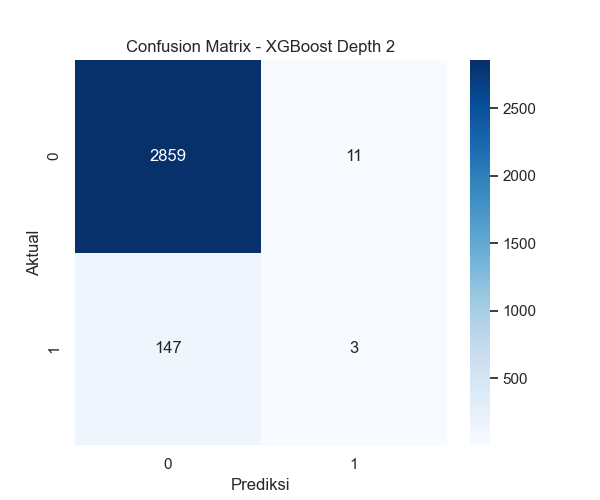

In [ ]:
# Confusion Matrix XGBoost Depth 2

# Predict langsung pakai pipeline
y_pred = loaded_pipeline_xgb2.predict(x_test)

# 3. Buat confusion matrix
cm = confusion_matrix(y_test, y_pred)

# 4. Plot heatmap
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.title("Confusion Matrix - XGBoost Depth 2")
plt.show()

In [ ]:
# Metrik ROC AUC, Sensitivity & Specificity XGBoost Depth 2

from scipy.sparse import issparse

# Load pipeline, pisahkan antara preprocessor & model
pipeline = loaded_pipeline_xgb2
preprocessor = pipeline.named_steps['preprocessing']
xgb2 = pipeline.named_steps['grid_search'].best_estimator_

# Ubah x_test menjadi fitur numerik saja
X_test_enc = preprocessor.transform(x_test)

# CRITICAL FIX: Convert sparse matrix to dense
if issparse(X_test_enc):
    print("✓ Converting sparse matrix to dense array...")
    X_test_enc = X_test_enc.toarray()
    print(f"✓ Converted shape: {X_test_enc.shape}")
else:
    print(f"✓ Already dense: {X_test_enc.shape}")

# Prediksi
y_prob = xgb2.predict_proba(X_test_enc)[:, 1]
y_pred = xgb2.predict(X_test_enc)

# Hitung metrik
roc_auc = roc_auc_score(y_test, y_prob)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

print(f"ROC AUC Score : {roc_auc:.4f}")
print(f"Sensitivity   : {sensitivity:.4f}")
print(f"Specificity   : {specificity:.4f}")


HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

✓ Already dense: (3020, 60)
ROC AUC Score : 0.8120
Sensitivity   : 0.0200
Specificity   : 0.9962


HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<Figure size 800x600 with 0 Axes>

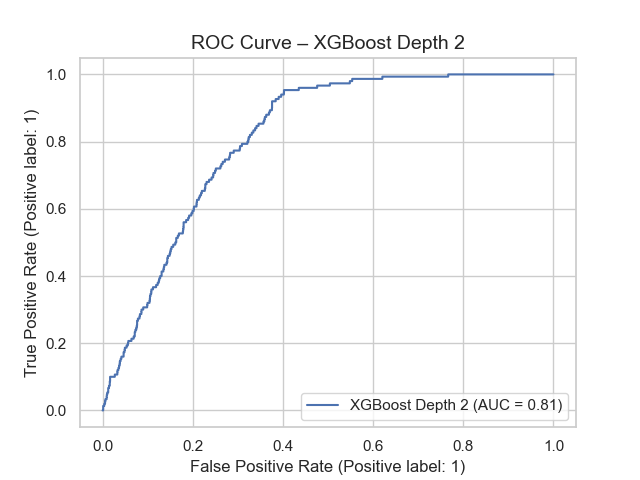

Checking if preprocessing outputs sparse matrix:
Type: <class 'numpy.ndarray'>
Is sparse: False


"\nfrom sklearn.preprocessing import OneHotEncoder\nfrom sklearn.compose import ColumnTransformer\n\n# When creating your preprocessing pipeline, set sparse=False for OneHotEncoder\ncategorical_transformer = OneHotEncoder(sparse=False, handle_unknown='ignore')\n\npreprocessor = ColumnTransformer(\n    transformers=[\n        ('cat', categorical_transformer, categorical_features),\n        ('num', numerical_transformer, numerical_features)\n    ],\n    sparse_threshold=0  # This ensures output is dense\n)\n"

In [ ]:
# ROC Curve XGBoost Depth 2
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

# Create a custom transformer to convert sparse to dense
class DenseTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        if hasattr(X, "toarray"):  # Check if it's a sparse matrix
            return X.toarray()
        return X

# Method 1: Add DenseTransformer to your pipeline
# Extract components from your loaded pipeline
preproc = loaded_pipeline_xgb2.named_steps['preprocessing']
grid_search = loaded_pipeline_xgb2.named_steps['grid_search']
best_model = grid_search.best_estimator_

# Build pipeline with dense converter
infer = Pipeline([
    ('preprocessing', preproc),
    ('to_dense', DenseTransformer()),  # Add this step
    ('model', best_model)
])

# Now predict probabilities
y_prob = infer.predict_proba(x_test)[:, 1]

# Plot ROC Curve
plt.figure(figsize=(8, 6))
RocCurveDisplay.from_predictions(
    y_test,
    y_prob,
    name="XGBoost Depth 2",
    pos_label=1
)
plt.title("ROC Curve – XGBoost Depth 2", fontsize=14)
plt.show()

# Method 2: Alternative - Manual conversion
# If you prefer to do it manually:
"""
# Transform the test data through preprocessing
x_test_preprocessed = preproc.transform(x_test)

# Convert to dense if sparse
if hasattr(x_test_preprocessed, "toarray"):
    x_test_dense = x_test_preprocessed.toarray()
else:
    x_test_dense = x_test_preprocessed

# Get probabilities
y_prob = best_model.predict_proba(x_test_dense)[:, 1]
"""

# Method 3: Check and fix preprocessing pipeline
# If you want to modify the preprocessing to output dense matrices
print("Checking if preprocessing outputs sparse matrix:")
x_sample_processed = preproc.transform(x_test[:5])
print(f"Type: {type(x_sample_processed)}")
print(f"Is sparse: {hasattr(x_sample_processed, 'toarray')}")

# If your preprocessing uses OneHotEncoder, you can set sparse=False
# Example of how to modify OneHotEncoder in preprocessing:
"""
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# When creating your preprocessing pipeline, set sparse=False for OneHotEncoder
categorical_transformer = OneHotEncoder(sparse=False, handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numerical_transformer, numerical_features)
    ],
    sparse_threshold=0  # This ensures output is dense
)
"""

In [ ]:
# Iterasi simulasi 10x XGBoost Depth 2
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.metrics import roc_auc_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from piml.models.xgb2.xgboost import XGB2Classifier

# Create a custom transformer to convert sparse to dense
class DenseTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        if hasattr(X, "toarray"):  # Check if it's a sparse matrix
            return X.toarray()
        return X

# Load your pipeline and extract best parameters
grid_pipeline = loaded_pipeline_xgb2
grid_search = grid_pipeline.named_steps['grid_search']
best_params = grid_search.best_params_

# Prepare lists for metrics
roc_auc_list = []
specificity_list = []
sensitivity_list = []

# Loop 10 times with fresh pipeline each iteration
for i in range(1, 11):
    # a) Create XGB2Classifier with best_params
    model_xgb2 = XGB2Classifier(n_estimators=250, tree_method="hist", **best_params)
    
    # b) Build pipeline with DenseTransformer
    pipeline = ImbPipeline([
        ('preprocessing', preprocessing),           # your preprocessing pipeline
        ('to_dense', DenseTransformer()),          # Convert sparse to dense
        ('oversampling', SMOTE(random_state=1)),   # SMOTE only in training
        ('model', model_xgb2)
    ])
    
    # c) Fit on training data
    pipeline.fit(x_train, y_train)
    
    # d) Predict & get probabilities on test data
    y_pred = pipeline.predict(x_test)
    y_prob = pipeline.predict_proba(x_test)[:, 1]
    
    # e) Calculate ROC-AUC
    roc = roc_auc_score(y_test, y_prob)
    roc_auc_list.append(roc)
    
    # f) Calculate specificity & sensitivity
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    spec = tn / (tn + fp) if (tn + fp) else 0
    sens = tp / (tp + fn) if (tp + fn) else 0
    specificity_list.append(spec)
    sensitivity_list.append(sens)
    
    # g) Display iteration results
    print(f"Iteration {i:2d}  —  ROC AUC: {roc:.4f},  Spec: {spec:.4f},  Sens: {sens:.4f}")

# Calculate means and standard deviations
roc_mean = np.mean(roc_auc_list)
roc_std = np.std(roc_auc_list, ddof=1)
spec_mean = np.mean(specificity_list)
spec_std = np.std(specificity_list, ddof=1)
sens_mean = np.mean(sensitivity_list)
sens_std = np.std(sensitivity_list, ddof=1)

print("\n" + "—"*50)
print("Rata-rata ± Std.Dev (10 iterasi):")
print(f"ROC AUC     : {roc_mean:.4f} ± {roc_std:.4f}")
print(f"Specificity : {spec_mean:.4f} ± {spec_std:.4f}")
print(f"Sensitivity : {sens_mean:.4f} ± {sens_std:.4f}")

# Alternative approach: Modify preprocessing to output dense matrices
# If you want to fix this at the source, here's how to modify your preprocessing:

"""
# Option 1: Set sparse_threshold=0 in ColumnTransformer
from sklearn.compose import ColumnTransformer

preprocessing = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numerical_transformer, numerical_features)
    ],
    sparse_threshold=0  # This ensures dense output
)

# Option 2: Set sparse=False in OneHotEncoder if you're using it
from sklearn.preprocessing import OneHotEncoder

categorical_transformer = OneHotEncoder(
    sparse=False,  # Output dense arrays
    handle_unknown='ignore'
)
"""

# Debug: Check what your preprocessing outputs
print("\nDebugging preprocessing output:")
sample_processed = preprocessing.fit_transform(x_train[:5], y_train[:5])
print(f"Type: {type(sample_processed)}")
print(f"Is sparse: {hasattr(sample_processed, 'toarray')}")
if hasattr(sample_processed, 'toarray'):
    print(f"Shape: {sample_processed.shape}")
    print("Converting to dense for XGBoost compatibility...")
else:
    print(f"Shape: {sample_processed.shape}")
    print("Already dense - good to go!")


HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

Iteration  1  —  ROC AUC: 0.8120,  Spec: 0.9962,  Sens: 0.0200
Iteration  2  —  ROC AUC: 0.8120,  Spec: 0.9962,  Sens: 0.0200
Iteration  3  —  ROC AUC: 0.8120,  Spec: 0.9962,  Sens: 0.0200
Iteration  4  —  ROC AUC: 0.8120,  Spec: 0.9962,  Sens: 0.0200
Iteration  5  —  ROC AUC: 0.8120,  Spec: 0.9962,  Sens: 0.0200
Iteration  6  —  ROC AUC: 0.8120,  Spec: 0.9962,  Sens: 0.0200
Iteration  7  —  ROC AUC: 0.8120,  Spec: 0.9962,  Sens: 0.0200
Iteration  8  —  ROC AUC: 0.8120,  Spec: 0.9962,  Sens: 0.0200
Iteration  9  —  ROC AUC: 0.8120,  Spec: 0.9962,  Sens: 0.0200
Iteration 10  —  ROC AUC: 0.8120,  Spec: 0.9962,  Sens: 0.0200

——————————————————————————————————————————————————
Rata-rata ± Std.Dev (10 iterasi):
ROC AUC     : 0.8120 ± 0.0000
Specificity : 0.9962 ± 0.0000
Sensitivity : 0.0200 ± 0.0000

Debugging preprocessing output:
Type: <class 'numpy.ndarray'>
Is sparse: False
Shape: (5, 35)
Already dense - good to go!


Shape X_pre (data asli setelah preprocessing): (12080, 60)
Intercept log-odds (mu) di-set dari rata-rata logit model (data asli): -3.4019165
Prevalensi positif di data asli (fraud fraction): 0.06142384105960265
Memilih top-10 fitur indices (berdasarkan weight): [2, 10, 8, 9, 11, 5, 0, 27, 1, 31] -> ['DriverRating', 'AgeOfPolicyHolder', 'PastNumberOfClaims', 'AgeOfVehicle', 'NumberOfSuppliments', 'VehiclePrice', 'Age', 'Make_Pontiac', 'Deductible', 'Make_Toyota']
Final used features setelah filter (memiliki thresholds): [2, 10, 8, 9, 11, 5, 0, 27, 1, 31] -> ['DriverRating', 'AgeOfPolicyHolder', 'PastNumberOfClaims', 'AgeOfVehicle', 'NumberOfSuppliments', 'VehiclePrice', 'Age', 'Make_Pontiac', 'Deductible', 'Make_Toyota']
=== Debug: h_raw sebelum purify ===
  Fitur 2 (DriverRating), bins=9, sample h_raw[:5]=[0.         0.34311457 0.16977949 0.62125193 1.00637398] ...
  Fitur 10 (AgeOfPolicyHolder), bins=13, sample h_raw[:5]=[ 0.          0.7568661   0.26850361 -0.00275502  0.        ] ..

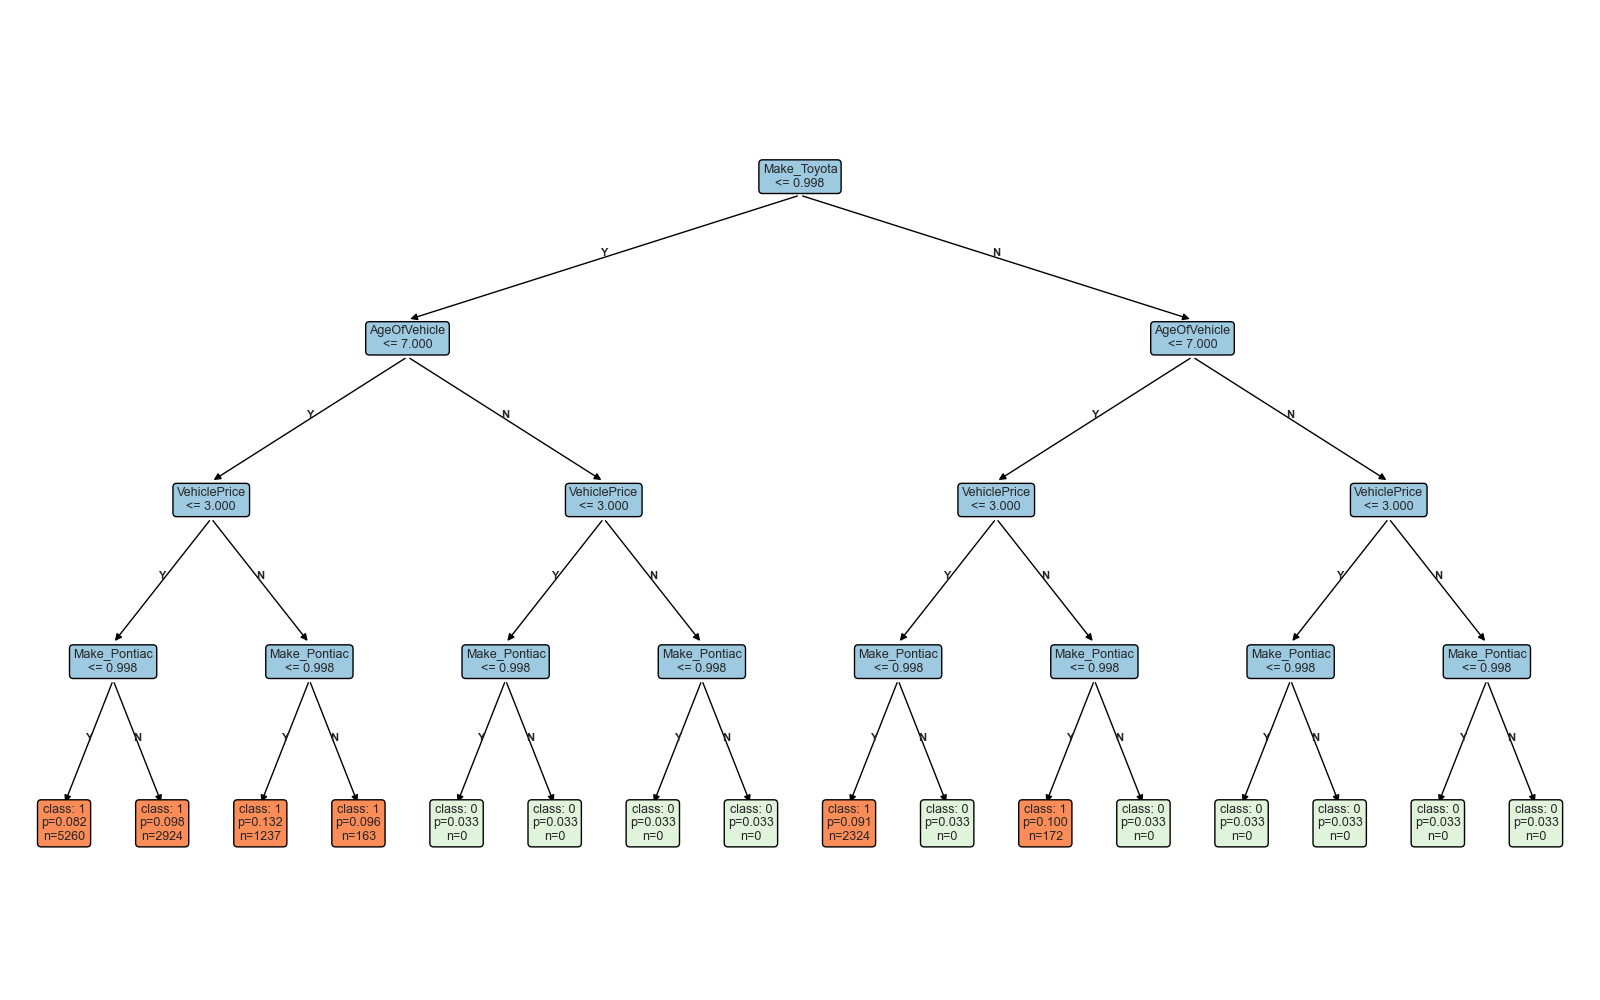

In [ ]:
# Menampilkan Pohon Tunggal GAMI dan Full Rule Set XGBoost Depth 2

import dill
import json
import numpy as np
import random
from itertools import product, combinations
from math import log, exp
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch
import pandas as pd

# ========================================
#  PASTIKAN: x_train, y_train telah didefinisikan
#  x_train: pd.DataFrame fitur asli sebelum SMOTE, kolom sesuai pipeline preprocessing
#  y_train: pd.Series label asli (0/1)
# ========================================
try:
    x_train
    y_train
except NameError:
    raise RuntimeError(
        "Variabel x_train dan y_train belum didefinisikan. "
        "Silakan siapkan DataFrame x_train dan Series y_train sesuai pipeline Anda."
    )

# ----------------------------------------
# 1) Load pipeline + XGB2Classifier terlatih
# ----------------------------------------
dill_path = "xgb2_15_models/xgb2_gridsearch_full_20250527_014604.dill"  # sesuaikan path jika perlu
with open(dill_path, "rb") as f:
    pipeline = dill.load(f)

preproc = pipeline.named_steps.get("preprocessing")
if preproc is None:
    raise RuntimeError("Pipeline tidak memiliki named_steps['preprocessing']")
gs = pipeline.named_steps.get("grid_search") or pipeline.named_steps.get("model")
if gs is None:
    raise RuntimeError("Pipeline tidak memiliki named_steps['grid_search'] atau ['model']")
if hasattr(gs, "best_estimator_"):
    est = gs.best_estimator_
else:
    est = gs
xgb2 = est
if hasattr(xgb2, "estimator_"):
    xgb2 = xgb2.estimator_
try:
    booster = xgb2.get_booster()
except Exception as e:
    raise RuntimeError(f"Gagal ambil booster dari model: {e}")

# ----------------------------------------
# 2) Transform x_train dan hitung probabilitas asli
# ----------------------------------------
X_pre = preproc.transform(x_train)
if hasattr(X_pre, "toarray"):
    X_pre = X_pre.toarray()
print("Shape X_pre (data asli setelah preprocessing):", X_pre.shape)

proba = xgb2.predict_proba(X_pre)[:, 1]
# Hindari 0 atau 1 persis
eps = 1e-6
proba = np.clip(proba, eps, 1 - eps)

# Rata-rata logit untuk intercept mu
logit = np.log(proba / (1 - proba))
mu = logit.mean()
print("Intercept log-odds (mu) di-set dari rata-rata logit model (data asli):", mu)

# Prevalensi positif
prevalence = float(y_train.mean())
print("Prevalensi positif di data asli (fraud fraction):", prevalence)

# ----------------------------------------
# 3) Feature names pasca-preprocessing
# ----------------------------------------
feat_out = preproc.get_feature_names_out()
def clean_feat(feat: str) -> str:
    return feat.split("__",1)[1] if "__" in feat else feat

# ----------------------------------------
# 4) Pilih top_k fitur untuk GAMI
# ----------------------------------------
importance_type = "weight"  # bisa "gain" atau "weight"
score_imp = booster.get_score(importance_type=importance_type)
feat_imp = []
for k, v in score_imp.items():
    if k.startswith("f") and k[1:].isdigit():
        idx = int(k[1:])
        if idx < len(feat_out):
            feat_imp.append((idx, clean_feat(feat_out[idx]), v))
feat_imp_sorted = sorted(feat_imp, key=lambda x: x[2], reverse=True)
top_k = 10  # sesuaikan jika perlu
used = [idx for idx, name, imp in feat_imp_sorted[:top_k]]
print(f"Memilih top-{top_k} fitur indices (berdasarkan {importance_type}):", used,
      "->", [clean_feat(feat_out[i]) for i in used])
if not used:
    raise RuntimeError("Tidak ada fitur terpilih; periksa model atau data.")

# ----------------------------------------
# 5) Kumpulkan thresholds (bins_1d) hanya untuk fitur di 'used'
# ----------------------------------------
trees_json = booster.get_dump(dump_format="json")
trees = [json.loads(t) for t in trees_json]

bins_1d = {i: set() for i in used}
def collect_thresholds(node):
    if "leaf" in node:
        return
    split = node.get("split", "")
    if split.startswith("f") and split[1:].isdigit():
        idx = int(split[1:])
        if idx in bins_1d:
            thr = node["split_condition"]
            bins_1d[idx].add(thr)
    for ch in node.get("children", []):
        collect_thresholds(ch)

for tree in trees:
    collect_thresholds(tree)

# Sorted lists; hapus fitur tanpa threshold
for i in list(bins_1d.keys()):
    lst = sorted(bins_1d[i])
    if len(lst) == 0:
        print(f"Fitur index {i} ({clean_feat(feat_out[i])}) tidak punya threshold, dihapus dari used.")
        used.remove(i)
        del bins_1d[i]
    else:
        bins_1d[i] = lst
print("Final used features setelah filter (memiliki thresholds):", used,
      "->", [clean_feat(feat_out[i]) for i in used])
if not used:
    raise RuntimeError("Semua fitur top_k tidak memiliki threshold split; pilih top_k berbeda atau turunkan.")

# ----------------------------------------
# 6) Inisialisasi container raw effects
# ----------------------------------------
h_raw = {i: np.zeros(len(bins_1d[i]) + 1) for i in used}
f_raw = {}
for i, j in combinations(sorted(used), 2):
    a, b = (i, j) if i < j else (j, i)
    f_raw[(a, b)] = np.zeros((len(bins_1d[a]) + 1, len(bins_1d[b]) + 1))

# ----------------------------------------
# 7) Route semua pohon: akumulasi leaf values ke h_raw / f_raw
# ----------------------------------------
def route_tree(node, path):
    if "leaf" in node:
        val = node["leaf"]
        path_used = [p for p in path if p[0] in used]
        last_split = {}
        for feat_idx, op, thr in path_used:
            last_split[feat_idx] = (op, thr)
        if len(last_split) == 1:
            i, (op, thr) = next(iter(last_split.items()))
            bi = np.digitize(thr, bins_1d[i])
            h_raw[i][bi] += val
        elif len(last_split) == 2:
            items = sorted(last_split.items(), key=lambda x: x[0])
            (i1, (_, thr1)), (i2, (_, thr2)) = items
            a, b = (i1, i2) if i1 < i2 else (i2, i1)
            if i1 < i2:
                thr_a, thr_b = thr1, thr2
            else:
                thr_a, thr_b = thr2, thr1
            bi = np.digitize(thr_a, bins_1d[a])
            bj = np.digitize(thr_b, bins_1d[b])
            f_raw[(a, b)][bi, bj] += val
        return
    split = node.get("split", "")
    if split.startswith("f") and split[1:].isdigit():
        idx = int(split[1:])
    else:
        idx = None
    thr = node.get("split_condition", None)
    if idx is not None:
        route_tree(node["children"][0], path + [(idx, "<", thr)])
        route_tree(node["children"][1], path + [(idx, ">=", thr)])
    else:
        for ch in node.get("children", []):
            route_tree(ch, path)

for tree in trees:
    route_tree(tree, [])

# Debug sebelum purify
print("=== Debug: h_raw sebelum purify ===")
for i in used:
    print(f"  Fitur {i} ({clean_feat(feat_out[i])}), bins={len(bins_1d[i])+1}, sample h_raw[:5]={h_raw[i][:5]} ...")
print("=== Debug: f_raw sebelum purify sums ===")
for (i, j), mat in f_raw.items():
    print(f"  Interaksi ({i},{j}), sum={mat.sum():.6f}, shape={mat.shape}")

# ----------------------------------------
# 8) Purifikasi interaksi agar conditional mean = 0
# ----------------------------------------
def purify(mat, h_i, h_j, tol=1e-6, max_iter=10):
    for _ in range(max_iter):
        row_m = mat.mean(axis=1)
        mat -= row_m[:, None]; h_i += row_m
        col_m = mat.mean(axis=0)
        mat -= col_m;     h_j += col_m
        if np.all(np.abs(row_m) < tol) and np.all(np.abs(col_m) < tol):
            break

for (i, j), mat in f_raw.items():
    purify(mat, h_raw[i], h_raw[j])

# ----------------------------------------
# 9) Zero-center main effects
# ----------------------------------------
for i in used:
    mu_i = h_raw[i].mean()
    h_raw[i] -= mu_i

# Debug setelah purify
print("=== Debug: h_raw setelah purify & zero-center ===")
for i in used:
    print(f"  Fitur {i} ({clean_feat(feat_out[i])}), std(h_raw)={np.std(h_raw[i]):.6f}, h_raw[:5]={h_raw[i][:5]} ...")
print("=== Debug: f_raw setelah purify sums ===")
for (i, j), mat in f_raw.items():
    print(f"  Interaksi ({i},{j}), sum={mat.sum():.6f}, shape={mat.shape}")

# ----------------------------------------
# 10) Fungsi compute_V_for_bin_indices
# ----------------------------------------
def compute_V_for_bin_indices(cell, used, h_raw, f_raw, mu):
    v = mu
    for i in used:
        bi = cell[i]
        v += h_raw[i][bi]
    for (i, j), mat in f_raw.items():
        if i in cell and j in cell:
            bi = cell[i]; bj = cell[j]
            v += mat[bi, bj]
    return v

# ----------------------------------------
# 11) Estimasi split stats & find_best_split
# ----------------------------------------
def estimate_group_stats_split(feature_i, t_idx, used, bins_1d, h_raw, f_raw, mu,
                               max_enum=5000, n_samples=1000, random_state=1):
    other_feats = [j for j in used if j != feature_i]
    total_combos = 1
    for j in other_feats:
        total_combos *= (len(bins_1d[j]) + 1)
        if total_combos > max_enum:
            break
    def all_combos_other():
        return product(*[range(len(bins_1d[j])+1) for j in other_feats])
    def process_bin_group(bin_i_values, do_sampling):
        vals = []
        if not do_sampling and total_combos <= max_enum:
            for bi in bin_i_values:
                for combo in all_combos_other():
                    cell = {feature_i: bi}
                    for k, j in enumerate(other_feats):
                        cell[j] = combo[k]
                    vals.append(compute_V_for_bin_indices(cell, used, h_raw, f_raw, mu))
            arr = np.array(vals, dtype=float)
            if arr.size == 0:
                return 0.0, 0.0, 0
            return arr.mean(), arr.var(), arr.size
        else:
            rng = random.Random(random_state)
            vals_s = []
            for _ in range(n_samples):
                bi = rng.choice(bin_i_values)
                cell = {feature_i: bi}
                for j in other_feats:
                    cell[j] = rng.randrange(len(bins_1d[j]) + 1)
                vals_s.append(compute_V_for_bin_indices(cell, used, h_raw, f_raw, mu))
            arr = np.array(vals_s, dtype=float)
            return arr.mean(), arr.var(), arr.size
    max_bin_i = len(bins_1d[feature_i])
    left_bins = list(range(0, t_idx+1))
    right_bins = list(range(t_idx+1, max_bin_i+1))
    do_sampling = total_combos > max_enum
    return process_bin_group(left_bins, do_sampling), process_bin_group(right_bins, do_sampling)

def find_best_split(used, bins_1d, h_raw, f_raw, mu,
                    max_enum=5000, n_samples=1000, random_state=1):
    counts = [len(bins_1d[j]) + 1 for j in used]
    total_parent = 1
    for c in counts:
        total_parent *= c
        if total_parent > max_enum:
            break
    def estimate_parent():
        if total_parent <= max_enum:
            vals = []
            for combo in product(*[range(len(bins_1d[j])+1) for j in used]):
                cell = {j: combo[k] for k,j in enumerate(used)}
                vals.append(compute_V_for_bin_indices(cell, used, h_raw, f_raw, mu))
            arr = np.array(vals, dtype=float)
            return arr.mean(), arr.var(), arr.size
        else:
            rng = random.Random(random_state)
            vals = []
            for _ in range(n_samples):
                combo = [rng.randrange(len(bins_1d[j])+1) for j in used]
                cell = {j: combo[k] for k,j in enumerate(used)}
                vals.append(compute_V_for_bin_indices(cell, used, h_raw, f_raw, mu))
            arr = np.array(vals, dtype=float)
            return arr.mean(), arr.var(), arr.size
    mean_P, var_P, n_P = estimate_parent()

    best_i = None; best_t = None; best_reduction = -np.inf; best_stats = None
    for i in used:
        max_bin_i = len(bins_1d[i])
        for t_idx in range(0, max_bin_i):
            (mean_L, var_L, n_L), (mean_R, var_R, n_R) = estimate_group_stats_split(
                i, t_idx, used, bins_1d, h_raw, f_raw, mu,
                max_enum=max_enum, n_samples=n_samples, random_state=random_state
            )
            total_n = n_L + n_R
            if total_n == 0:
                continue
            within_var = (n_L*var_L + n_R*var_R) / total_n
            reduction = var_P - within_var
            if reduction > best_reduction:
                best_reduction = reduction
                best_i, best_t = i, t_idx
                best_stats = {
                    'mean_parent': mean_P, 'var_parent': var_P, 'n_parent': n_P,
                    'mean_L': mean_L, 'var_L': var_L, 'n_L': n_L,
                    'mean_R': mean_R, 'var_R': var_R, 'n_R': n_R,
                }
    return best_i, best_t, best_reduction, best_stats

# ----------------------------------------
# 12) Kelas node GAMI
# ----------------------------------------
class GamiNode:
    def __init__(self, feature_idx=None, threshold_idx=None, left=None, right=None, value=None):
        self.feature_idx = feature_idx
        self.threshold_idx = threshold_idx
        self.left = left
        self.right = right
        self.value = value

# ----------------------------------------
# 13) Build GAMI-tree (rekursif)
# ----------------------------------------
def build_gami_tree(used, bins_1d, h_raw, f_raw, mu,
                    max_depth=4, min_reduction=1e-4,
                    max_enum=5000, n_samples=1000, random_state=1, depth=0):
    best_i, best_t, best_red, stats = find_best_split(
        used, bins_1d, h_raw, f_raw, mu,
        max_enum=max_enum, n_samples=n_samples, random_state=random_state
    )
    if best_i is None or best_red < min_reduction or depth >= max_depth:
        if stats is not None:
            val = stats['mean_parent']
        else:
            rng = random.Random(random_state + depth)
            if len(used) > 0:
                combo = [rng.randrange(len(bins_1d[j])+1) for j in used]
                cell = {j: combo[k] for k,j in enumerate(used)}
                val = compute_V_for_bin_indices(cell, used, h_raw, f_raw, mu)
            else:
                val = mu
        return GamiNode(value=val)
    node = GamiNode(feature_idx=best_i, threshold_idx=best_t)
    used_child = [j for j in used if j != best_i]
    node.left = build_gami_tree(
        used_child, bins_1d, h_raw, f_raw, mu,
        max_depth=max_depth, min_reduction=min_reduction,
        max_enum=max_enum, n_samples=n_samples, random_state=random_state, depth=depth+1
    )
    node.right = build_gami_tree(
        used_child, bins_1d, h_raw, f_raw, mu,
        max_depth=max_depth, min_reduction=min_reduction,
        max_enum=max_enum, n_samples=n_samples, random_state=random_state, depth=depth+1
    )
    return node

gami_root = build_gami_tree(
    used, bins_1d, h_raw, f_raw, mu,
    max_depth=4,
    min_reduction=1e-4,
    max_enum=5000,
    n_samples=1000,
    random_state=42
)
print("GAMI-Tree dibangun dengan max_depth=4")

# ----------------------------------------
# 14) Cetak full rules set (data-driven p leaf)
# ----------------------------------------
def print_rules_gami_with_mask(node, bins_1d, feat_out, X_pre, proba, prevalence, mask=None, indent_level=0):
    if mask is None:
        mask = np.ones(X_pre.shape[0], dtype=bool)
    indent = "  " * indent_level
    if node.feature_idx is not None:
        i = node.feature_idx
        thr_val = bins_1d[i][node.threshold_idx]
        feat_name = clean_feat(feat_out[i])
        cond_left = f"{feat_name} <= {thr_val:.4f}"
        print(f"{indent}|-- {cond_left}")
        mask_left = mask & (X_pre[:, i] <= thr_val)
        print_rules_gami_with_mask(node.left, bins_1d, feat_out, X_pre, proba, prevalence, mask_left, indent_level+1)

        cond_right = f"{feat_name} >  {thr_val:.4f}"
        print(f"{indent}|-- {cond_right}")
        mask_right = mask & (X_pre[:, i] > thr_val)
        print_rules_gami_with_mask(node.right, bins_1d, feat_out, X_pre, proba, prevalence, mask_right, indent_level+1)
    else:
        if mask.sum() > 0:
            p_leaf = proba[mask].mean()
        else:
            logodds = node.value
            p_leaf = 1/(1+exp(-logodds))
        cls = 1 if p_leaf > prevalence else 0
        print(f"{indent}|-- class: {cls}    (p={p_leaf:.3f}, n_samples={mask.sum()})")

print("\n=== FULL RULE SET GAMI (data-driven p leaf) (max_depth=4) ===")
print_rules_gami_with_mask(gami_root, bins_1d, feat_out, X_pre, proba, prevalence)

# ----------------------------------------
# 15) Visualisasi pohon GAMI dengan kotak menggunakan bbox di ax.text
# ----------------------------------------
def draw_edge(ax, x_parent, y_parent, x_child, y_child, label=None):
    offset = 0.4
    start = (x_parent, y_parent - offset)
    end   = (x_child,  y_child + offset)
    arrow = FancyArrowPatch(start, end,
                            arrowstyle='-|>', mutation_scale=10,
                            linewidth=1.0, color='black', zorder=0)
    ax.add_patch(arrow)
    if label is not None:
        mx = (start[0] + end[0]) / 2
        my = (start[1] + end[1]) / 2
        ax.text(mx, my + 0.1, label, ha='center', va='center',
                fontsize=8, fontweight='bold', zorder=3)

def plot_gami_tree_rectangular_bbox(gami_root, feat_out, bins_1d, clean_feat_func,
                               X_pre, proba, prevalence,
                               figsize=(14, 8), fontsize=9,
                               vertical_gap=3.5, horizontal_gap=3.5):
    """
    Visualisasi GAMI-tree dengan kotak pada tiap node, ukuran otomatis mengikuti teks
    (menggunakan bbox pada ax.text), dan leaf diwarnai berdasarkan p_leaf vs prevalence.
    """
    # 1) Hitung posisi node dengan inorder traversal
    def compute_positions(node, depth=0, x_counter=[0], pos=None):
        if pos is None:
            pos = {}
        if node is None:
            return pos
        if node.feature_idx is not None and node.left is not None:
            compute_positions(node.left, depth+1, x_counter, pos)
        x = x_counter[0]
        pos[node] = (x, depth)
        x_counter[0] += 1
        if node.feature_idx is not None and node.right is not None:
            compute_positions(node.right, depth+1, x_counter, pos)
        return pos

    pos_idx = compute_positions(gami_root, depth=0, x_counter=[0], pos={})
    coords = {}
    for node, (x_idx, depth) in pos_idx.items():
        x = x_idx * horizontal_gap
        y = - depth * vertical_gap
        coords[node] = (x, y)

    fig, ax = plt.subplots(figsize=figsize)
    ax.axis('off')

    # 2) Assign mask per node untuk menghitung p leaf
    node_masks = {}
    def assign_masks(node, mask):
        node_masks[node] = mask
        if node.feature_idx is not None:
            i = node.feature_idx
            thr_val = bins_1d[i][node.threshold_idx]
            mask_left = mask & (X_pre[:, i] <= thr_val)
            mask_right = mask & (X_pre[:, i] > thr_val)
            assign_masks(node.left, mask_left)
            assign_masks(node.right, mask_right)
    mask_root = np.ones(X_pre.shape[0], dtype=bool)
    assign_masks(gami_root, mask_root)

    # 3) Gambar edges terlebih dahulu
    for node, (x, y) in coords.items():
        if node.feature_idx is not None:
            if node.left is not None:
                xc, yc = coords[node.left]
                draw_edge(ax, x, y, xc, yc, label='Y')
            if node.right is not None:
                xc, yc = coords[node.right]
                draw_edge(ax, x, y, xc, yc, label='N')

    # 4) Gambar nodes: gunakan ax.text dengan bbox
    for node, (x, y) in coords.items():
        if node.feature_idx is None:
            # Leaf: hitung p rata-rata pada subset data
            mask = node_masks[node]
            if mask.sum() > 0:
                p_leaf = proba[mask].mean()
            else:
                logodds = node.value
                p_leaf = 1/(1+np.exp(-logodds))
            cls = 1 if p_leaf > prevalence else 0
            text = f"class: {cls}\np={p_leaf:.3f}\nn={mask.sum()}"
            # Pewarnaan leaf: misal hijau muda jika <= prevalence, merah jika > prevalence
            face = '#e0f3db' if p_leaf <= prevalence else '#fc8d59'
            # Gunakan bbox: boxstyle "round,pad=0.3" atau "square,pad=0.3"
            ax.text(
                x, y, text,
                ha='center', va='center',
                fontsize=fontsize,
                bbox=dict(boxstyle="round,pad=0.3", facecolor=face, edgecolor='black'),
                zorder=2
            )
        else:
            i = node.feature_idx
            thr_val = bins_1d[i][node.threshold_idx]
            feat_name = clean_feat_func(feat_out[i])
            text = f"{feat_name}\n<= {thr_val:.3f}"
            ax.text(
                x, y, text,
                ha='center', va='center',
                fontsize=fontsize,
                bbox=dict(boxstyle="round,pad=0.3", facecolor='#9ecae1', edgecolor='black'),
                zorder=2
            )

    # 5) Atur limits agar seluruh pohon tampil
    all_x = [coord[0] for coord in coords.values()]
    all_y = [coord[1] for coord in coords.values()]
    if all_x and all_y:
        margin_x = horizontal_gap
        margin_y = vertical_gap
        ax.set_xlim(min(all_x)-margin_x, max(all_x)+margin_x)
        ax.set_ylim(min(all_y)-margin_y, max(all_y)+margin_y)
    plt.tight_layout()
    plt.show()

# Panggil visualisasi
print("\nMenampilkan visualisasi pohon GAMI (kotak otomatis via bbox, data-driven p leaf):")
plot_gami_tree_rectangular_bbox(
    gami_root,
    feat_out=feat_out,
    bins_1d=bins_1d,
    clean_feat_func=clean_feat,
    X_pre=X_pre,
    proba=proba,
    prevalence=prevalence,
    figsize=(16, 10),
    fontsize=9,
    vertical_gap=3.5,
    horizontal_gap=3.5
)
